# Определение стоимости квартир

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 

**Цель**

    Установить параметры. 
    Это позволит построить автоматизированную систему: 
    она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

### Библиотеки

Импортируем все используемые далее библиотеки.

In [71]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Убрираем длинные циферки. Трех знаков после запятой будет достаточно.

In [72]:
pd.set_option('display.float_format', '{:,.3f}'.format)

Отключаем лишние предупреждения.

In [73]:
import warnings
warnings.filterwarnings('ignore')

In [74]:
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    ! gdown --id 1XzOEIrMHT7QlL8xyIzMR16KnGKcxF9D8
    df = pd.read_csv('/content/real_estate_data.csv', sep='\t')
# Данные через разделитель '\t'. Табличка не читалась.

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1XzOEIrMHT7QlL8xyIzMR16KnGKcxF9D8
To: /content/real_estate_data.csv
100% 3.21M/3.21M [00:00<00:00, 141MB/s]


Посмотрим первые и последние строки таблицы.


In [75]:
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.000",108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,...,25.000,NaN,Санкт-Петербург,"18,863.000","16,028.000",1.000,482.000,2.000,755.000,NaN
1,7,"3,350,000.000",40.400,2018-12-04T00:00:00,1,NaN,11.000,18.600,1,NaN,...,11.000,2.000,посёлок Шушары,"12,817.000","18,603.000",0.000,NaN,0.000,NaN,81.000
2,10,"5,196,000.000",56.000,2015-08-20T00:00:00,2,NaN,5.000,34.300,4,NaN,...,8.300,0.000,Санкт-Петербург,"21,741.000","13,933.000",1.000,90.000,2.000,574.000,558.000
3,0,"64,900,000.000",159.000,2015-07-24T00:00:00,3,NaN,14.000,NaN,9,NaN,...,NaN,0.000,Санкт-Петербург,"28,098.000","6,800.000",2.000,84.000,3.000,234.000,424.000
4,2,"10,000,000.000",100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,...,41.000,NaN,Санкт-Петербург,"31,856.000","8,098.000",2.000,112.000,1.000,48.000,121.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,"9,700,000.000",133.810,2017-03-21T00:00:00,3,3.700,5.000,73.300,3,NaN,...,13.830,NaN,Санкт-Петербург,"24,665.000","4,232.000",1.000,796.000,3.000,381.000,NaN
23695,14,"3,100,000.000",59.000,2018-01-15T00:00:00,3,NaN,5.000,38.000,4,NaN,...,8.500,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.000
23696,18,"2,500,000.000",56.700,2018-02-11T00:00:00,2,NaN,3.000,29.700,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,"11,475,000.000",76.750,2017-03-28T00:00:00,2,3.000,17.000,NaN,12,NaN,...,23.300,2.000,Санкт-Петербург,"39,140.000","10,364.000",2.000,173.000,3.000,196.000,602.000


Много колонок. Посмотрим их названия.

In [76]:
display(df.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Названия колонок не в "змеином регистре". Меняем:

In [77]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

Названия колонок не информативны, сложно будет генерировать гипотезы для проверок. Исправляем:

In [78]:
df_rus = df.rename(columns={'total_images': 'кол_фот',
                            'last_price': 'цена',
                            'total_area': 's_общая',
                            'first_day_exposition': 'дата_публикации',
                            'rooms': 'комнат',
                            'ceiling_height': 'h_пот',
                            'floors_total': 'всего_этаж',
                            'living_area': 'жилая_s',
                            'floor': 'этаж',
                            'is_apartment': 'апарт',
                            'studio': 'студия',
                            'open_plan': 'своб_план',
                            'kitchen_area': 's_кухни',
                            'balcony': 'балконов',
                            'locality_name': 'назв_нас_пункта',
                            'airports_nearest': 'до_аэроп',
                            'city_centers_nearest': 'до_центр',
                            'parks_around3000': 'парков_3_км',
                            'parks_nearest': 'до_ближ_парка',
                            'ponds_around3000': 'вод_3_км',
                            'ponds_nearest': 'до_ближ_вод',
                            'days_exposition': 'дней_с_опубл',})

Похожие параметры разбросаны. Поменяем очередность колонок.

In [79]:
df_rus = df_rus[['кол_фот', 'дата_публикации', 'цена', 
                 'назв_нас_пункта', 's_общая', 'жилая_s', 's_кухни', 
                 'комнат', 'балконов', 'h_пот', 'всего_этаж', 'этаж', 
                 'апарт', 'студия', 'своб_план', 'до_аэроп', 'до_центр', 
                 'парков_3_км', 'до_ближ_парка', 'вод_3_км', 
                 'до_ближ_вод', 'дней_с_опубл']]
df_rus

,кол_фот,дата_публикации,цена,назв_нас_пункта,s_общая,жилая_s,s_кухни,комнат,балконов,h_пот,...,апарт,студия,своб_план,до_аэроп,до_центр,парков_3_км,до_ближ_парка,вод_3_км,до_ближ_вод,дней_с_опубл
0,20,2019-03-07T00:00:00,"13,000,000.000",Санкт-Петербург,108.000,51.000,25.000,3,NaN,2.700,...,NaN,False,False,"18,863.000","16,028.000",1.000,482.000,2.000,755.000,NaN
1,7,2018-12-04T00:00:00,"3,350,000.000",посёлок Шушары,40.400,18.600,11.000,1,2.000,NaN,...,NaN,False,False,"12,817.000","18,603.000",0.000,NaN,0.000,NaN,81.000
2,10,2015-08-20T00:00:00,"5,196,000.000",Санкт-Петербург,56.000,34.300,8.300,2,0.000,NaN,...,NaN,False,False,"21,741.000","13,933.000",1.000,90.000,2.000,574.000,558.000
3,0,2015-07-24T00:00:00,"64,900,000.000",Санкт-Петербург,159.000,NaN,NaN,3,0.000,NaN,...,NaN,False,False,"28,098.000","6,800.000",2.000,84.000,3.000,234.000,424.000
4,2,2018-06-19T00:00:00,"10,000,000.000",Санкт-Петербург,100.000,32.000,41.000,2,NaN,3.030,...,NaN,False,False,"31,856.000","8,098.000",2.000,112.000,1.000,48.000,121.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,2017-03-21T00:00:00,"9,700,000.000",Санкт-Петербург,133.810,73.300,13.830,3,NaN,3.700,...,NaN,False,False,"24,665.000","4,232.000",1.000,796.000,3.000,381.000,NaN
23695,14,2018-01-15T00:00:00,"3,100,000.000",Тосно,59.000,38.000,8.500,3,NaN,NaN,...,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,45.000
23696,18,2018-02-11T00:00:00,"2,500,000.000",село Рождествено,56.700,29.700,NaN,2,NaN,NaN,...,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,2017-03-28T00:00:00,"11,475,000.000",Санкт-Петербург,76.750,NaN,23.300,2,2.000,3.000,...,NaN,False,False,"39,140.000","10,364.000",2.000,173.000,3.000,196.000,602.000


### Описание данных

	• airports_nearest     — до_аэроп        — расстояние до ближайшего аэропорта в метрах (м)
	• balcony              — балконов        — число балконов
	• ceiling_height       — h_пот           — высота потолков (м)
	• city_centers_nearest — до_центр        — расстояние до центра города (м)
	• days_exposition      — дней_с_опубл    — сколько дней было размещено объявление (от публикации до снятия)
	• first_day_exposition — дата_публикации — дата публикации
	• floor                — этаж            — этаж
	• floors_total         — всего_этаж      — всего этажей в доме
	• is_apartment         — апарт           — апартапартаменты (булев тип)
	• kitchen_area         — s_кухни         — площадь кухни в квадратных метрах (м²)
	• last_price           — цена            — цена на момент снятия с публикации
	• living_area          — жилая_s         — жилая площадь в квадратных метрах (м²)
	• locality_name        — назв_нас_пункта — название населённого пункта
	• open_plan            — своб_план       — свободная планировка (булев тип)
	• parks_around3000     — парков_3_км     — число парков в радиусе 3 км
	• parks_nearest        — до_ближ_парка   — расстояние до ближайшего парка (м)
	• ponds_around3000     — вод_3_км        — число водоёмов в радиусе 3 км
	• ponds_nearest        — до_ближ_вод     — расстояние до ближайшего водоёма (м)
	• rooms                — комнат          — число комнат
	• studio               — студия          — квартира-студия (булев тип)
	• total_area           — s_общая         — площадь квартиры в квадратных метрах (м²)
	• total_images         — кол_фот         — число фотографий квартиры в объявлении

Посмотрим заполненость таблицы

In [80]:
print('\nИнфо:')
print(df_rus.info()) # сколько значений и в каком формате
print('\nПропусков:')
print(df_rus.isna().mean()) # подсчёт пропусков в долях (перевод в % - лишний код)
print('\nОписание:')
display(df_rus.describe()) # вдруг чего "на глазок" проявится 
print('\nДубликатов =', df.duplicated().sum()) # проверим дубликаты


Инфо:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   кол_фот          23699 non-null  int64  
 1   дата_публикации  23699 non-null  object 
 2   цена             23699 non-null  float64
 3   назв_нас_пункта  23650 non-null  object 
 4   s_общая          23699 non-null  float64
 5   жилая_s          21796 non-null  float64
 6   s_кухни          21421 non-null  float64
 7   комнат           23699 non-null  int64  
 8   балконов         12180 non-null  float64
 9   h_пот            14504 non-null  float64
 10  всего_этаж       23613 non-null  float64
 11  этаж             23699 non-null  int64  
 12  апарт            2775 non-null   object 
 13  студия           23699 non-null  bool   
 14  своб_план        23699 non-null  bool   
 15  до_аэроп         18157 non-null  float64
 16  до_центр         18180 non-null  float64
 17  парко

,кол_фот,цена,s_общая,жилая_s,s_кухни,комнат,балконов,h_пот,всего_этаж,этаж,до_аэроп,до_центр,парков_3_км,до_ближ_парка,вод_3_км,до_ближ_вод,дней_с_опубл
count,"23,699.000","23,699.000","23,699.000","21,796.000","21,421.000","23,699.000","12,180.000","14,504.000","23,613.000","23,699.000","18,157.000","18,180.000","18,181.000","8,079.000","18,181.000","9,110.000","20,518.000"
mean,9.858,"6,541,548.772",60.349,34.458,10.570,2.071,1.150,2.771,10.674,5.892,"28,793.672","14,191.278",0.611,490.805,0.770,517.981,180.889
std,5.683,"10,887,013.268",35.654,22.030,5.905,1.078,1.071,1.261,6.597,4.885,"12,630.881","8,608.386",0.802,342.318,0.938,277.721,219.728
min,0.000,"12,190.000",12.000,2.000,1.300,0.000,0.000,1.000,1.000,1.000,0.000,181.000,0.000,1.000,0.000,13.000,1.000
25%,6.000,"3,400,000.000",40.000,18.600,7.000,1.000,0.000,2.520,5.000,2.000,"18,585.000","9,238.000",0.000,288.000,0.000,294.000,45.000
50%,9.000,"4,650,000.000",52.000,30.000,9.100,2.000,1.000,2.650,9.000,4.000,"26,726.000","13,098.500",0.000,455.000,1.000,502.000,95.000
75%,14.000,"6,800,000.000",69.900,42.300,12.000,3.000,2.000,2.800,16.000,8.000,"37,273.000","16,293.000",1.000,612.000,1.000,729.000,232.000
max,50.000,"763,000,000.000",900.000,409.700,112.000,19.000,5.000,100.000,60.000,33.000,"84,869.000","65,968.000",3.000,"3,190.000",3.000,"1,344.000","1,580.000"



Дубликатов = 0




##### Вывод

Может помешать в расчетах:

    дата_публикации    23699 non-null object    - формат не даты
    цена               23699 non-null  float64  - на квартиры цены с копейками не бывает.
    комнат             21796 non-null float64   - не целое число комнат - это как?
    балконов           12180 non-null  float64  - балконов должно быть целое число на квартиру
    апарт              2775 non-null object     - формат не булевый


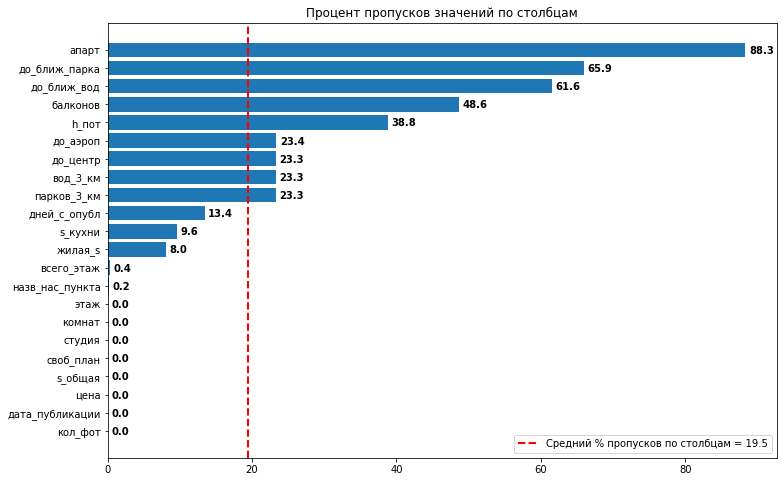

In [81]:
columns = df_rus.columns.values.tolist()
nan = []

for col in columns:
    not_nan_count = df_rus[col].count()
    percent = ((len(df_rus) - not_nan_count) / len(df_rus)) * 100
    nan.append(percent)

nan_percent_before = pd.Series(nan,
                               index = columns)
nan_percent_before_mean = nan_percent_before.mean()
nan_percent_before.sort_values(ascending=True,
                               inplace=True)

fig, ax = plt.subplots(figsize=(12,8))
ax.barh(nan_percent_before.index,
        nan_percent_before.values)
ax.set_title('Процент пропусков значений по столбцам')

# Добавим на график цифры значений
for i in ax.patches:
    plt.text(i.get_width()+0.5,
             i.get_y()+0.2,
             str(round(i.get_width(),1)),
             fontsize=10,
             fontweight='bold',
             color='black')

# Построим линию, показывающую средний % пропусков по столбцам
plt.axvline(x=nan_percent_before_mean,
            linewidth=2,
            label='Средний % пропусков по столбцам = {}'.format(round(nan_percent_before_mean, 1)),
            color='r',
            linestyle='--')

plt.legend()
plt.show()

Посмотрим корреляцию значений столбцов друг с другом. Может пригодится при заполнении пропусков.

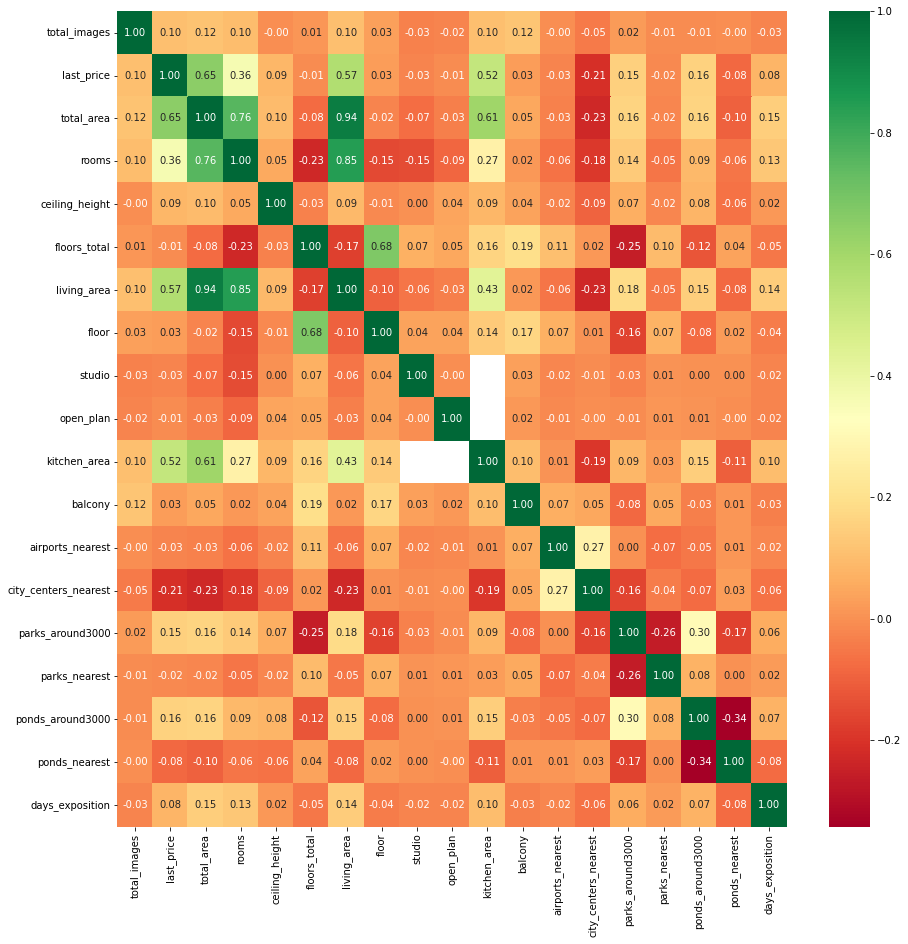

In [82]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),
            annot=True,
            cmap='RdYlGn',
            fmt='.2f')
plt.show()

Разброс параметров и очевидные аномалии оценим в следующем разделе.

## Предобработка данных

Проверяем, какими значениями заполнена табличка.

Смотрим значения с сортировкой, чтобы аномалии проявились с концов списка.

В разделе 1 вырисовался не корректный формат некоторых данных. Тут их и поменяем.

### 'кол_фот:'

In [83]:
display('кол_фот:', df['total_images'].sort_values().unique())

'кол_фот:'

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35,
       37, 39, 42, 50])

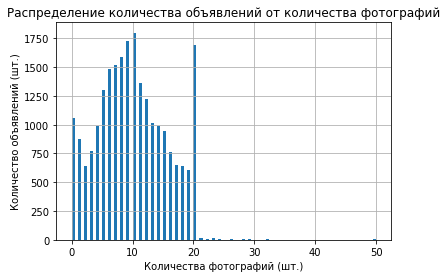

In [84]:
display(df['total_images'].hist(bins=100))
plt.title("Распределение количества объявлений от количества фотографий")
plt.xlabel("Количества фотографий (шт.)")
plt.ylabel("Количество объявлений (шт.)")
plt.show() 

### 'дата_публикации:'

Меняем формат `дата_публикации`на дату.

In [85]:
df['first_day_exposition'] = pd.to_datetime( df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S' )
display('дата_публикации:', df['first_day_exposition'].sort_values().unique())

'дата_публикации:'

array(['2014-11-27T00:00:00.000000000', '2014-11-29T00:00:00.000000000',
       '2014-12-04T00:00:00.000000000', ...,
       '2019-05-01T00:00:00.000000000', '2019-05-02T00:00:00.000000000',
       '2019-05-03T00:00:00.000000000'], dtype='datetime64[ns]')

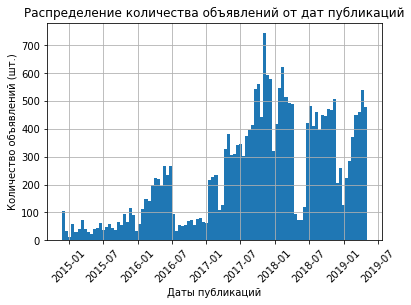

In [86]:
display(df['first_day_exposition'].hist(bins = 100))
plt.title("Распределение количества объявлений от дат публикаций")
plt.xlabel("Даты публикаций")
plt.xticks(rotation = 45)
plt.ylabel("Количество объявлений (шт.)")
plt.show()

### 'цена:'

На квартиры цены с копейками не бывает.

In [87]:
df['last_price'] = df['last_price'].astype('int')
display('цена:', df['last_price'].sort_values().unique())

'цена:'

array([    12190,    430000,    440000, ..., 401300000, 420000000,
       763000000])

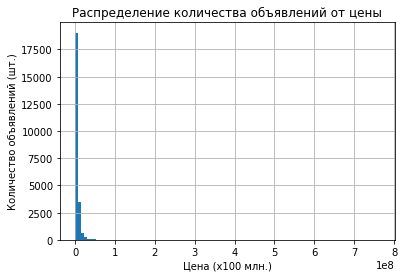

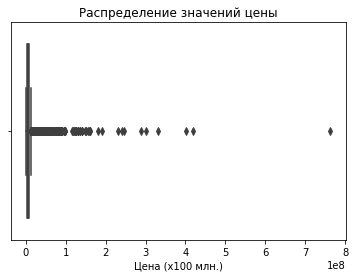

In [88]:
display(df['last_price'].hist(bins=100))
plt.title("Распределение количества объявлений от цены")
plt.xlabel("Цена (х100 млн.)")
plt.ylabel("Количество объявлений (шт.)")
plt.show()
display(ax = sns.boxplot(data = df,
                         x = 'last_price',
                         orient = 'h'))
plt.title("Распределение значений цены")
plt.xlabel("Цена (х100 млн.)")
plt.show()

Цена от 12 тыс. до 763 млн. Великоватый разброс.

Разные валюты?

Не только квартиры?

Использовать аккуратно.

### 'назв_нас_пункта:'

In [89]:
display('назв_нас_пункта:', df['locality_name'].sort_values().unique())

'назв_нас_пункта:'

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Исправляем лишний креатив в названиях.

In [90]:
df['locality_name'] = df['locality_name'].str.replace('посёлок','поселок')
df['locality_name'] = df['locality_name'].str.replace('при железнодорожной станции','станции')
df['locality_name'] = df['locality_name'].str.replace('садоводческое некоммерческое товарищество','садовое товарищество')

Меняем на список, не компьютер же читает:

In [91]:
print('\nназв_нас_пункта:\n')
loc = df['locality_name'].sort_values().unique()
for i in range(len(loc)):
    print(loc[i])


назв_нас_пункта:

Бокситогорск
Волосово
Волхов
Всеволожск
Выборг
Высоцк
Гатчина
Зеленогорск
Ивангород
Каменногорск
Кингисепп
Кириши
Кировск
Колпино
Коммунар
Красное Село
Кронштадт
Кудрово
Лодейное Поле
Ломоносов
Луга
Любань
Мурино
Никольское
Новая Ладога
Отрадное
Павловск
Петергоф
Пикалёво
Подпорожье
Приморск
Приозерск
Пушкин
Санкт-Петербург
Светогорск
Сертолово
Сестрорецк
Сланцы
Сосновый Бор
Сясьстрой
Тихвин
Тосно
Шлиссельбург
городской поселок Большая Ижора
городской поселок Будогощь
городской поселок Виллози
городской поселок Лесогорский
городской поселок Мга
городской поселок Назия
городской поселок Новоселье
городской поселок Павлово
городской поселок Рощино
городской поселок Свирьстрой
городской поселок Советский
городской поселок Фёдоровское
городской поселок Янино-1
деревня Агалатово
деревня Аро
деревня Батово
деревня Бегуницы
деревня Белогорка
деревня Большая Вруда
деревня Большая Пустомержа
деревня Большие Колпаны
деревня Большое Рейзино
деревня Большой Сабск
деревня Бор
дер

Есть пропуски. Сколько?

In [92]:
print(df['locality_name'].isnull().sum(), "из", len(df))

49 из 23699


75% объявлений лежат в радиусе 16293 метра. Возьмем с запасом, учтя нижеприведенный график "до_центр".

In [93]:
df.loc[(df['locality_name'].isna()) & 
       (df['city_centers_nearest'] <= 20000), 
       'locality_name'] = "Санкт-Петербург"
print(df['locality_name'].isnull().sum(), "из", len(df))

12 из 23699


### 's_общая:'

In [94]:
display('s_общая:', df['total_area'].sort_values().unique())

's_общая:'

array([ 12. ,  13. ,  13.2, ..., 631. , 631.2, 900. ])

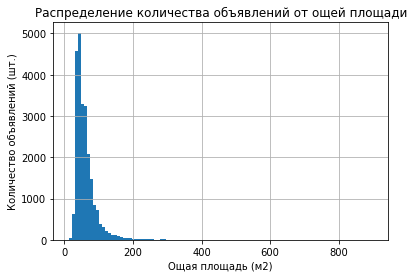

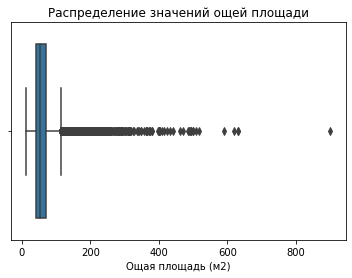

In [95]:
display(df['total_area'].hist(bins=100))
plt.title("Распределение количества объявлений от ощей площади")
plt.xlabel("Ощая площадь (м2)")
plt.ylabel("Количество объявлений (шт.)")
plt.show()
display(ax = sns.boxplot(data = df,
                         x = 'total_area',
                         orient = 'h'))
plt.title("Распределение значений ощей площади")
plt.xlabel("Ощая площадь (м2)")
plt.show()

Посмотрим на квартирку в 900 квадратов:

In [96]:
df.query('total_area == 900')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000,900.000,2017-12-06,12,2.800,25.000,409.700,25,NaN,...,112.000,NaN,Санкт-Петербург,"30,706.000","7,877.000",0.000,NaN,2.000,318.000,106.000


Похоже на пентхаус. Вроде ничего фантастичного.

При использовании убедиться, что площади в сотни или 12-15 метров реальные.



### 'жилая_s:'

In [97]:
display('жилая_s:', df['living_area'].sort_values().unique())

'жилая_s:'

array([  2. ,   3. ,   5. , ..., 409. , 409.7,   nan])

Тут и далее заменим пропущенные значения на -1, чтобы потом их можно было вычислить, а пока не мешали оперировать с цифрами.

In [98]:
df['living_area'] = df['living_area'].fillna(-1)
display('жилая_s без пропусков:', df['living_area'].sort_values().unique())

'жилая_s без пропусков:'

array([ -1. ,   2. ,   3. , ..., 347.5, 409. , 409.7])

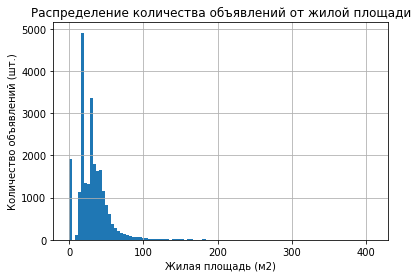

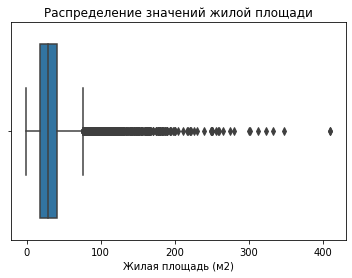

In [99]:
display(df['living_area'].hist(bins=100))
plt.title("Распределение количества объявлений от жилой площади")
plt.xlabel("Жилая площадь (м2)")
plt.ylabel("Количество объявлений (шт.)")
plt.show()
display(ax = sns.boxplot(data = df,
                         x = 'living_area',
                         orient = 'h'))
plt.title("Распределение значений жилой площади")
plt.xlabel("Жилая площадь (м2)")
plt.show()

Сомнительно выглядят жилые площади в 2, 3, 5 квадратов.

### 's_кухни:'

In [100]:
display('s_кухни:', df['kitchen_area'].sort_values().unique())

's_кухни:'

array([  1.3 ,   2.  ,   2.3 ,   2.4 ,   2.89,   3.  ,   3.2 ,   3.3 ,
         3.4 ,   3.5 ,   3.7 ,   3.8 ,   4.  ,   4.1 ,   4.2 ,   4.3 ,
         4.4 ,   4.5 ,   4.6 ,   4.7 ,   4.8 ,   4.9 ,   5.  ,   5.04,
         5.06,   5.1 ,   5.14,   5.2 ,   5.21,   5.23,   5.25,   5.28,
         5.29,   5.3 ,   5.31,   5.33,   5.35,   5.4 ,   5.42,   5.44,
         5.47,   5.49,   5.5 ,   5.53,   5.59,   5.6 ,   5.61,   5.62,
         5.64,   5.65,   5.68,   5.7 ,   5.74,   5.75,   5.78,   5.8 ,
         5.82,   5.85,   5.86,   5.9 ,   5.91,   6.  ,   6.02,   6.03,
         6.1 ,   6.16,   6.19,   6.2 ,   6.22,   6.23,   6.24,   6.25,
         6.26,   6.27,   6.28,   6.3 ,   6.31,   6.33,   6.35,   6.36,
         6.37,   6.4 ,   6.47,   6.5 ,   6.55,   6.58,   6.6 ,   6.61,
         6.62,   6.65,   6.7 ,   6.72,   6.73,   6.76,   6.77,   6.8 ,
         6.82,   6.83,   6.84,   6.86,   6.9 ,   6.91,   6.93,   6.95,
         7.  ,   7.02,   7.03,   7.06,   7.09,   7.1 ,   7.12,   7.15,
      

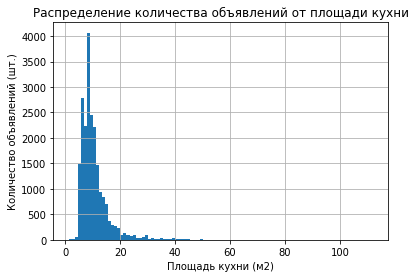

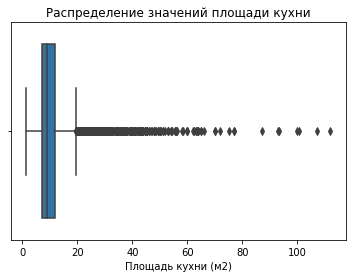

In [101]:
display(df['kitchen_area'].hist(bins=100))
plt.title("Распределение количества объявлений от площади кухни")
plt.xlabel("Площадь кухни (м2)")
plt.ylabel("Количество объявлений (шт.)")
plt.show()
display(ax = sns.boxplot(data = df,
                         x = 'kitchen_area',
                         orient = 'h'))
plt.title("Распределение значений площади кухни")
plt.xlabel("Площадь кухни (м2)")
plt.show()

Кухни в 1,3 кв.м. под вопросом, но чего только могут поненапридумывать в студиях. Ведь можно откидной столик рядом с унитазом назвать обеденным столом. А если над этим еще и лейку душа повесить... То вообще получится крайне компактное многофункциональное помещение (3in1). А если розетку - то и кабинет добавится.

Кухни побольше квартир трехкомнатных так же подозрительны.

Есть пропущенные значения. Можно восстановить по данным общей площади.

### 'комнат:'

Меняем формат значений количества комнат на целочисленные значения.

In [102]:
df['rooms'] = df['rooms'].astype('int')
display('комнат:', df['rooms'].sort_values().unique())

'комнат:'

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19])

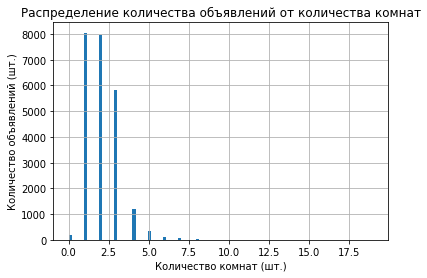

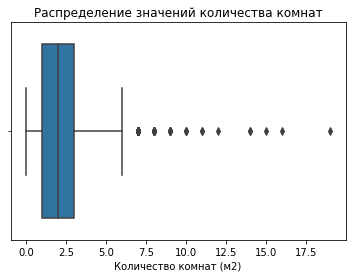

In [103]:
display(df['rooms'].hist(bins=100))
plt.title("Распределение количества объявлений от количества комнат")
plt.xlabel("Количество комнат (шт.)")
plt.ylabel("Количество объявлений (шт.)")
plt.show() 
display(ax = sns.boxplot(data = df,
                         x = 'rooms',
                         orient = 'h'))
plt.title("Распределение значений количества комнат")
plt.xlabel("Количество комнат (м2)")
plt.show()

Линейка получилась довольно ровная, но 19 комнат на квартиру...? Не однозначно.

In [104]:
df.query('rooms == 19')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14498,6,32250000,374.600,2018-06-09,19,NaN,5.000,264.500,2,NaN,...,27.600,NaN,Санкт-Петербург,"19,497.000","3,574.000",0.000,NaN,2.000,548.000,114.000


Вполне себе коммуналка.

А 0 комнат - это что?

In [105]:
print('Количество квартир без комнат =', len(df.query('rooms == 0')))

Количество квартир без комнат = 197


In [106]:
df.query('rooms == 0 and studio == True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000,27.000,2017-03-30,0,NaN,24.000,15.500,2,NaN,...,NaN,2.000,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.000
440,8,2480000,27.110,2018-03-12,0,NaN,17.000,24.750,4,NaN,...,NaN,2.000,Санкт-Петербург,"38,171.000","15,015.000",0.000,NaN,2.000,982.000,64.000
608,2,1850000,25.000,2019-02-20,0,NaN,10.000,-1.000,7,NaN,...,NaN,NaN,поселок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.000
697,12,2500000,24.100,2017-12-01,0,2.750,25.000,17.500,21,NaN,...,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.000
716,5,1500000,17.000,2017-06-07,0,2.700,9.000,12.000,1,NaN,...,NaN,0.000,поселок Шушары,"18,654.000","29,846.000",0.000,NaN,0.000,NaN,40.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000,30.000,2017-12-17,0,NaN,25.000,18.200,5,NaN,...,NaN,NaN,Санкт-Петербург,"35,250.000","16,414.000",0.000,NaN,1.000,400.000,211.000
22877,2,4280000,28.000,2017-10-26,0,2.700,19.000,18.000,10,NaN,...,NaN,NaN,Санкт-Петербург,"18,982.000","7,206.000",0.000,NaN,1.000,415.000,151.000
23210,7,3200000,26.000,2017-09-01,0,NaN,25.000,18.000,16,NaN,...,NaN,0.000,Санкт-Петербург,"11,405.000","13,222.000",0.000,NaN,1.000,623.000,14.000
23554,15,3350000,26.000,2018-09-07,0,NaN,19.000,-1.000,8,NaN,...,NaN,NaN,Санкт-Петербург,"18,090.000","17,092.000",0.000,NaN,2.000,112.000,31.000


138 из 197 квартир - это студии.

Возможно должен быть столбец с назначением помещения.

Согласно СП 54.13330.2016 есть ограничения на минимальную площадь относительно количества комнат:


*   1 комната - квартира минимум 28 кв.м.
*   2 комнаты - квартира минимум 44 кв.м.
*   3 комнаты - квартира минимум 56 кв.м.
*   4 комнаты - квартира минимум 70 кв.м.
*   5 комнат - квартира минимум 103 кв.м.
*   более 5 комнат - минимальный размер равен количеству комнат * 20 кв.м.

Проверим предложенные квартиры на соответствие.







In [107]:
all_flats = df.shape[0]
correct_flats = (df.query('rooms == 1 and total_area >= 28').shape[0] + 
                 df.query('rooms == 2 and total_area >= 44').shape[0] + 
                 df.query('rooms == 3 and total_area >= 56').shape[0] + 
                 df.query('rooms == 4 and total_area >= 70').shape[0] +
                 df.query('rooms == 5 and total_area >= 103').shape[0] +
                 df.query('rooms > 5 and (total_area >= (rooms) * 20)').shape[0])
print(all_flats - correct_flats, "квартира не соответсвуют требованиям.")
print("Это", ((all_flats - correct_flats)/all_flats*100), "% от общего числа представленных квартир.")

1901 квартира не соответсвуют требованиям.
Это 8.021435503607748 % от общего числа представленных квартир.


Но тут могут быть постройки сданые ранее вступления в силу нормативов 2016 года. Так что не трогаем.

### 'балконов:'

In [108]:
display('балконов:', df['balcony'].sort_values().unique())

'балконов:'

array([ 0.,  1.,  2.,  3.,  4.,  5., nan])

Заменим пропущенные значения на -1, чтобы потом их можно было вычислить.

In [109]:
df['balcony'] = df['balcony'].fillna(-1)

Не целый балкон - это плохой балкон. Меняем формат на целочисленный.

In [110]:
df['balcony'] = df['balcony'].astype('int')
display('балконов без пропусков:', df['balcony'].sort_values().unique())

'балконов без пропусков:'

array([-1,  0,  1,  2,  3,  4,  5])

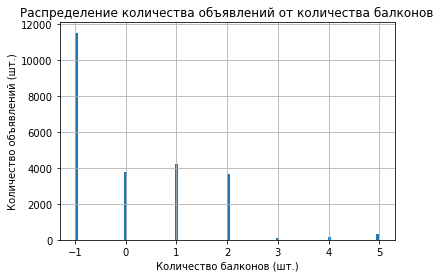

In [111]:
display(df['balcony'].hist(bins=100))
plt.title("Распределение количества объявлений от количества балконов")
plt.xlabel("Количество балконов (шт.)")
plt.ylabel("Количество объявлений (шт.)")
plt.show()

5 балконов - перебор. Дурацкие великоватые значения обязаны коррелироваться между собой. Иначе - это мусор.

In [112]:
df.query('balcony == 5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
41,16,7900000,74.000,2016-05-04,3,NaN,14.000,59.000,8,False,...,12.000,5,Санкт-Петербург,"37,715.000","12,612.000",1.000,725.000,1.000,759.000,179.000
42,13,22000000,161.800,2015-07-08,4,2.800,4.000,80.900,2,False,...,17.600,5,Петергоф,"35,416.000","30,605.000",2.000,47.000,1.000,907.000,987.000
116,18,10999000,97.200,2017-11-13,3,2.500,16.000,-1.000,16,NaN,...,18.300,5,Санкт-Петербург,"19,426.000","21,138.000",0.000,NaN,2.000,390.000,394.000
267,2,14700000,120.000,2018-09-07,3,2.750,20.000,63.000,18,NaN,...,16.000,5,Санкт-Петербург,"39,204.000","10,430.000",2.000,627.000,3.000,77.000,61.000
311,20,12500000,86.000,2018-10-19,3,2.800,25.000,47.000,3,NaN,...,13.000,5,Санкт-Петербург,"52,192.000","15,686.000",0.000,NaN,1.000,441.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23147,8,5780000,55.000,2017-11-23,2,2.550,10.000,28.600,8,False,...,8.000,5,Санкт-Петербург,"42,447.000","11,146.000",1.000,451.000,0.000,NaN,41.000
23289,13,7000000,88.000,2018-03-02,3,2.500,15.000,54.000,12,False,...,12.000,5,Колпино,"24,501.000","30,287.000",1.000,372.000,0.000,NaN,NaN
23363,10,4300000,52.000,2019-04-21,1,2.700,16.000,28.000,8,False,...,11.000,5,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23526,14,5800000,60.690,2018-03-13,3,2.500,9.000,39.700,2,NaN,...,6.200,5,Санкт-Петербург,"51,239.000","15,954.000",0.000,NaN,0.000,NaN,30.000


Количество балконов не соответствует общей площади и количеству комнат. Но 304 ошибки как то многовато.

### 'h_пот:'

In [113]:
display('h_пот:', df['ceiling_height'].sort_values().unique())

'h_пот:'

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

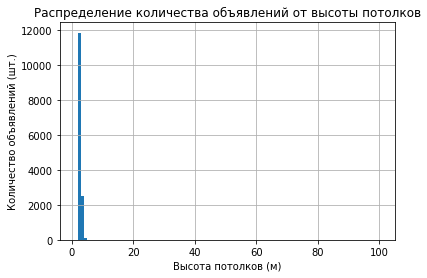

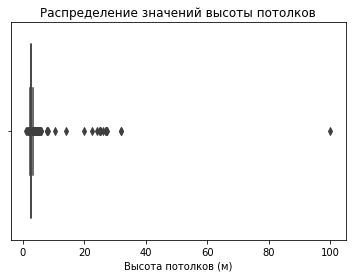

In [114]:
display(df['ceiling_height'].hist(bins=100))
plt.title("Распределение количества объявлений от высоты потолков")
plt.xlabel("Высота потолков (м)")
plt.ylabel("Количество объявлений (шт.)")
plt.show()
display(ax = sns.boxplot(data = df,
                         x = 'ceiling_height',
                         orient = 'h'))
plt.title("Распределение значений высоты потолков")
plt.xlabel("Высота потолков (м)")
plt.show()

Скорее всего начало и конец списка - хлам.
Но тут, так же как и с комнатами, привязка к действующим нормативам может быть не корректной. У нас нет оснований полагать, что представлена информация по новостройкам.

Если в список вошли хоз. постройки, то высота может быть и меньше 2 метров. Если есть помещения пром. назначения, то высота более 4 метров - это нормально. Хотя и тут 100 м - перебор.

Интересно, в петропавловском шпиле есть перекрытия, или с пола видно маковку изнутри?

### 'всего_этаж:'

In [115]:
display('всего_этаж:', df['floors_total'].sort_values().unique())

'всего_этаж:'

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60., nan])

Заменим пропущенные значения на -1, чтобы потом их можно было вычислить.

In [116]:
df['floors_total'] = df['floors_total'].fillna(-1)

Если этаж не полный, значит дом не достроен или поломан, меняем формат на целочисленный.

In [117]:
df['floors_total'] = df['floors_total'].astype('int')
display('всего_этаж без пропусков:', df['floors_total'].sort_values().unique())

'всего_этаж без пропусков:'

array([-1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36,
       37, 52, 60])

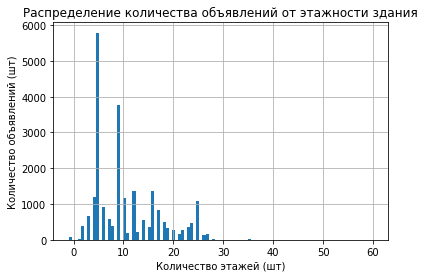

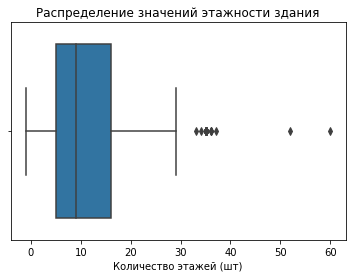

In [118]:
display(df['floors_total'].hist(bins=100))
plt.title("Распределение количества объявлений от этажности здания")
plt.xlabel("Количество этажей (шт)")
plt.ylabel("Количество объявлений (шт)")
plt.show()
display(ax = sns.boxplot(data = df,
                         x = 'floors_total',
                         orient = 'h'))
plt.title("Распределение значений этажности здания")
plt.xlabel("Количество этажей (шт)")
plt.show()

### 'этаж:'

In [119]:
display('этаж:', df['floor'].sort_values().unique())

'этаж:'

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

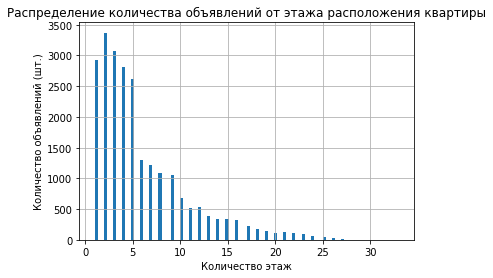

In [120]:
display(df['floor'].hist(bins=100))
plt.title("Распределение количества объявлений от этажа расположения квартиры")
plt.xlabel("Количество этаж")
plt.ylabel("Количество объявлений (шт.)")
plt.show() 

### 'апарт:'

Заменим формат значений `апарт` на булевый тип. Т.к. вариантов должно быть 2: Да и Нет.

In [121]:
df['is_apartment'] = df['is_apartment'].astype('bool')
display('апарт:', df['is_apartment'].sort_values().unique())
print()
display("Распределение значений 'аппартаменты':", df['is_apartment'].value_counts())

'апарт:'

array([False,  True])

"Распределение значений 'аппартаменты':"

True     20974
False     2725
Name: is_apartment, dtype: int64

### 'студия:'

In [122]:
display('студия:', df['studio'].sort_values().unique())
print()
display("Распределение значений 'студия':", df['studio'].value_counts())

'студия:'

array([False,  True])

"Распределение значений 'студия':"

False    23550
True       149
Name: studio, dtype: int64

### 'своб_план:'

In [123]:
display('своб_план:', df['open_plan'].sort_values().unique())
print()
display("Распределение значений 'свободная планировка':", df['open_plan'].value_counts())

'своб_план:'

array([False,  True])

"Распределение значений 'свободная планировка':"

False    23632
True        67
Name: open_plan, dtype: int64

### 'до_аэроп:'

In [124]:
display('до_аэроп:', df['airports_nearest'].sort_values().unique())

'до_аэроп:'

array([    0.,  6450.,  6914., ..., 84853., 84869.,    nan])

Заменим пропущенные значения на -1.

In [125]:
df['airports_nearest'] = df['airports_nearest'].fillna(-1)

Точность до сантиметров будет лишней, меняем формат на целочисленный.

In [126]:
df['airports_nearest'] = df['airports_nearest'].astype('int')
display('до_аэроп без пропусков:', df['airports_nearest'].sort_values().unique())

'до_аэроп без пропусков:'

array([   -1,     0,  6450, ..., 84665, 84853, 84869])

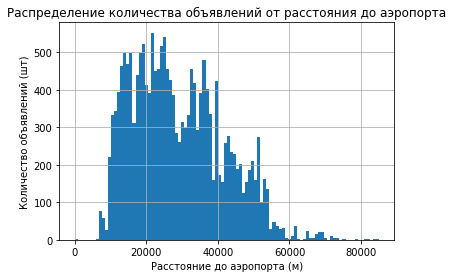

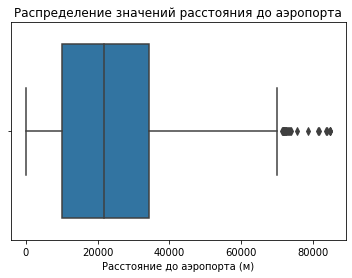

In [127]:
display(df['airports_nearest'].hist(bins=100,
                                    range = (0, 85000))) # много пропусков, это портит картинку, -1 убираем
plt.title("Распределение количества объявлений от расстояния до аэропорта")
plt.xlabel("Расстояние до аэропорта (м)")
plt.ylabel("Количество объявлений (шт)")
plt.show()
display(ax = sns.boxplot(data = df,
                         x = 'airports_nearest',
                         orient = 'h'))
plt.title("Распределение значений расстояния до аэропорта")
plt.xlabel("Расстояние до аэропорта (м)")
plt.show()

### 'до_центр:'

In [128]:
display('до_центр:', df['city_centers_nearest'].sort_values().unique())

'до_центр:'

array([  181.,   208.,   215., ..., 65952., 65968.,    nan])

Заменим пропущенные значения на -1.

In [129]:
df['city_centers_nearest'] = df['city_centers_nearest'].fillna(-1)
df['city_centers_nearest'] = df['city_centers_nearest'].astype('int')
display('до_центр без пропусков:', df['city_centers_nearest'].sort_values().unique())

'до_центр без пропусков:'

array([   -1,   181,   208, ..., 65764, 65952, 65968])

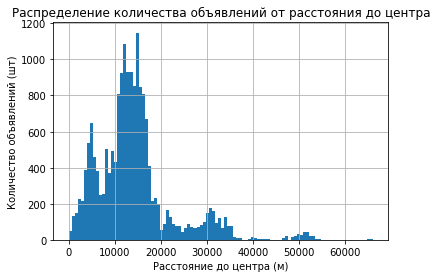

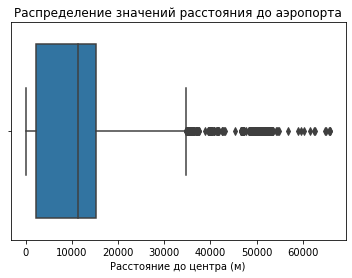

In [130]:
display(df['city_centers_nearest'].hist(bins=100,
                                        range = (0, 66000))) # много пропусков, это портит картинку
plt.title("Распределение количества объявлений от расстояния до центра")
plt.xlabel("Расстояние до центра (м)")
plt.ylabel("Количество объявлений (шт)")
plt.show()
display(ax = sns.boxplot(data = df,
                         x = 'city_centers_nearest',
                         orient = 'h'))
plt.title("Распределение значений расстояния до аэропорта")
plt.xlabel("Расстояние до центра (м)")
plt.show()

### 'парк в 3 км:'

In [131]:
display('парков_3_км:', df['parks_around3000'].sort_values().unique())

'парков_3_км:'

array([ 0.,  1.,  2.,  3., nan])

In [132]:
df['parks_around3000'] = df['parks_around3000'].fillna(-1)
df['parks_around3000'] = df['parks_around3000'].astype('int')
display('парков_3_км без пропусков:', df['parks_around3000'].sort_values().unique())

'парков_3_км без пропусков:'

array([-1,  0,  1,  2,  3])

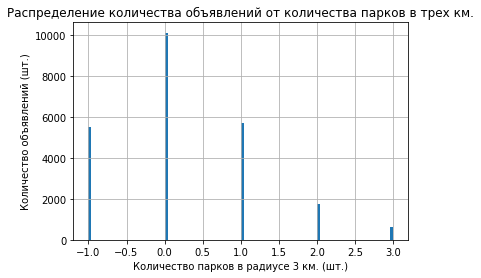

In [133]:
display(df['parks_around3000'].hist(bins=100))
plt.title("Распределение количества объявлений от количества парков в трех км.")
plt.xlabel("Количество парков в радиусе 3 км. (шт.)")
plt.ylabel("Количество объявлений (шт.)")
plt.show() 

### 'до_ближ_парка:'

In [134]:
display('до_ближ_парка:', df['parks_nearest'].sort_values().unique())

'до_ближ_парка:'

array([1.000e+00, 3.000e+00, 4.000e+00, 7.000e+00, 9.000e+00, 1.000e+01,
       1.100e+01, 1.200e+01, 1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01,
       1.700e+01, 1.800e+01, 1.900e+01, 2.000e+01, 2.100e+01, 2.200e+01,
       2.300e+01, 2.400e+01, 2.700e+01, 2.800e+01, 3.000e+01, 3.200e+01,
       3.300e+01, 3.400e+01, 3.500e+01, 3.600e+01, 3.700e+01, 3.800e+01,
       3.900e+01, 4.000e+01, 4.100e+01, 4.200e+01, 4.300e+01, 4.400e+01,
       4.500e+01, 4.600e+01, 4.700e+01, 4.800e+01, 4.900e+01, 5.000e+01,
       5.100e+01, 5.200e+01, 5.300e+01, 5.400e+01, 5.500e+01, 5.600e+01,
       5.700e+01, 5.800e+01, 5.900e+01, 6.000e+01, 6.100e+01, 6.200e+01,
       6.300e+01, 6.400e+01, 6.500e+01, 6.600e+01, 6.700e+01, 6.800e+01,
       6.900e+01, 7.100e+01, 7.200e+01, 7.300e+01, 7.400e+01, 7.500e+01,
       7.600e+01, 7.700e+01, 7.800e+01, 8.000e+01, 8.100e+01, 8.200e+01,
       8.300e+01, 8.400e+01, 8.500e+01, 8.600e+01, 8.700e+01, 8.800e+01,
       9.000e+01, 9.100e+01, 9.200e+01, 9.300e+01, 

In [135]:
df['parks_nearest'] = df['parks_nearest'].fillna(-1)
df['parks_nearest'] = df['parks_nearest'].astype('int')
display('до_ближ_парка без пропусков:', df['parks_nearest'].sort_values().unique())

'до_ближ_парка без пропусков:'

array([  -1,    1,    3,    4,    7,    9,   10,   11,   12,   13,   14,
         15,   16,   17,   18,   19,   20,   21,   22,   23,   24,   27,
         28,   30,   32,   33,   34,   35,   36,   37,   38,   39,   40,
         41,   42,   43,   44,   45,   46,   47,   48,   49,   50,   51,
         52,   53,   54,   55,   56,   57,   58,   59,   60,   61,   62,
         63,   64,   65,   66,   67,   68,   69,   71,   72,   73,   74,
         75,   76,   77,   78,   80,   81,   82,   83,   84,   85,   86,
         87,   88,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  144,
        145,  146,  147,  148,  149,  150,  151,  152,  153,  154,  155,
        156,  157,  158,  159,  160,  161,  162,  1

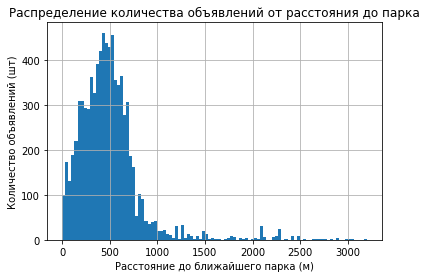

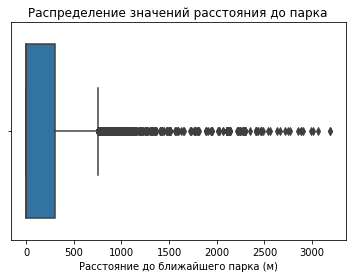

In [136]:
display(df['parks_nearest'].hist(bins=100,
                                 range = (0, 3200))) # много пропусков
plt.title("Распределение количества объявлений от расстояния до парка")
plt.xlabel("Расстояние до ближайшего парка (м)")
plt.ylabel("Количество объявлений (шт)")
plt.show()
display(ax = sns.boxplot(data = df,
                         x = 'parks_nearest',
                         orient = 'h'))
plt.title("Распределение значений расстояния до парка")
plt.xlabel("Расстояние до ближайшего парка (м)")
plt.show()

Есть пропущенные значения.

### 'вода в 3 км:'

In [137]:
display('вод_3_км:', df['ponds_around3000'].sort_values().unique())

'вод_3_км:'

array([ 0.,  1.,  2.,  3., nan])

In [138]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(-1)
df['ponds_around3000'] = df['ponds_around3000'].astype('int')
display('вод_3_км без пропусков:', df['ponds_around3000'].sort_values().unique())

'вод_3_км без пропусков:'

array([-1,  0,  1,  2,  3])

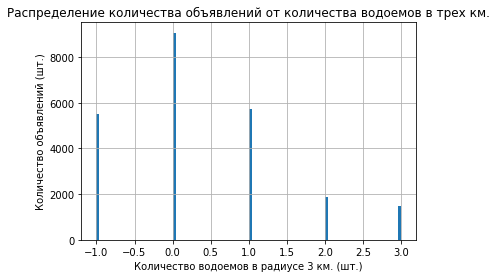

In [139]:
display(df['ponds_around3000'].hist(bins=100))
plt.title("Распределение количества объявлений от количества водоемов в трех км.")
plt.xlabel("Количество водоемов в радиусе 3 км. (шт.)")
plt.ylabel("Количество объявлений (шт.)")
plt.show() 

### 'до_ближ_вод:'

In [140]:
display('до_ближ_вод:', df['ponds_nearest'].sort_values().unique())

'до_ближ_вод:'

array([  13.,   16.,   19., ..., 1341., 1344.,   nan])

In [141]:
df['ponds_nearest'] = df['ponds_nearest'].fillna(-1)
df['ponds_nearest'] = df['ponds_nearest'].astype('int')
display('до_ближ_вод без пропусков:', df['ponds_nearest'].sort_values().unique())

'до_ближ_вод без пропусков:'

array([  -1,   13,   16, ..., 1337, 1341, 1344])

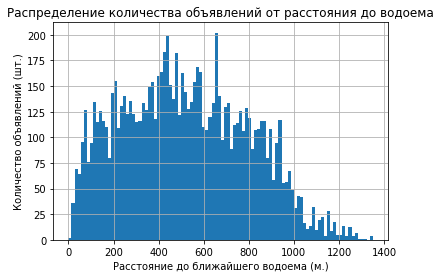

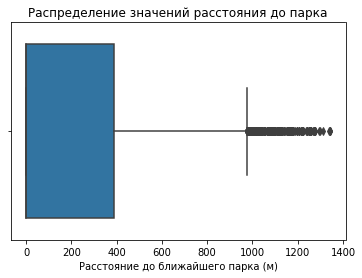

In [142]:
display(df['ponds_nearest'].hist(bins=100,
                                 range = (0, 1350))) # много пропусков
plt.title("Распределение количества объявлений от расстояния до водоема")
plt.xlabel("Расстояние до ближайшего водоема (м.)")
plt.ylabel("Количество объявлений (шт.)")
plt.show()
display(ax = sns.boxplot(data = df,
                         x = 'ponds_nearest',
                         orient = 'h'))
plt.title("Распределение значений расстояния до парка")
plt.xlabel("Расстояние до ближайшего парка (м)")
plt.show()

### 'дней с опубл:'

In [143]:
display('дней_с_опубл:', df['days_exposition'].sort_values().unique())

'дней_с_опубл:'

array([1.000e+00, 2.000e+00, 3.000e+00, ..., 1.572e+03, 1.580e+03,
             nan])

In [144]:
df['days_exposition'] = df['days_exposition'].fillna(-1)
df['days_exposition'] = df['days_exposition'].astype('int')
display('дней_с_опубл без пропусков:', df['days_exposition'].sort_values().unique())

'дней_с_опубл без пропусков:'

array([  -1,    1,    2, ..., 1553, 1572, 1580])

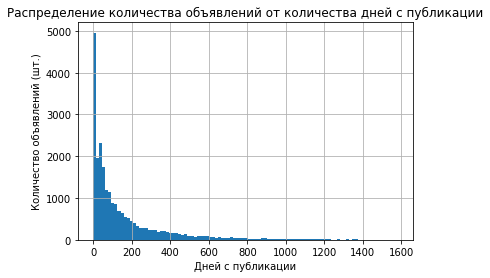

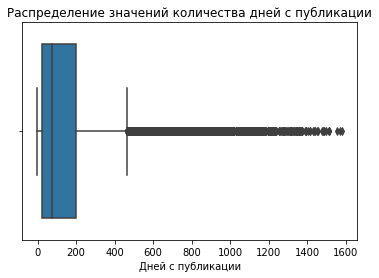

In [145]:
display(df['days_exposition'].hist(bins=100))
plt.title("Распределение количества объявлений от количества дней с публикации")
plt.xlabel("Дней с публикации")
plt.ylabel("Количество объявлений (шт.)")
plt.show()
display(ax = sns.boxplot(data = df,
                         x = 'days_exposition',
                         orient = 'h'))
plt.title("Распределение значений количества дней с публикации")
plt.xlabel("Дней с публикации")
plt.show()

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

### Дополнение недостающих значений

#### Высота потолков (`ceiling_height`)

Диапазон основного тела выборки этого параметра достаточно узок, это значит, что большинство значения будут плюс минус равны. В данном случае, отлично подходит заполнение медианой.

In [147]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
display('h_пот:', df['ceiling_height'].sort_values().unique())

'h_пот:'

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

#### Жилая_s (`living_area`) и s_кухни (`kitchen_area`)

Эти параметры достаточно хорошо связаны с общей площадью, т.к. чаще всего в квартирах площадь кухни и жилая площадь имеют какую-то долю от общей. Эту долю можно посчитать на основе имеющихся данных, например, для разного кол-ва комнат.  

In [148]:
for room in df['rooms'].unique():
        median_value = df[(df['rooms'] == room)]['living_area'].median()
        df.loc[(df['rooms'] == room),
               'living_area'] = df.loc[(df['rooms'] == room),
                                       'living_area'].fillna(median_value)
for room in df['rooms'].unique():
        median_value = df[(df['rooms'] == room)]['kitchen_area'].median()
        df.loc[(df['rooms'] == room),
               'kitchen_area'] = df.loc[(df['rooms'] == room),
                                        'kitchen_area'].fillna(median_value)
display('жилая_s:', df['living_area'].sort_values().unique())
display('s_кухни:', df['kitchen_area'].sort_values().unique())

'жилая_s:'

array([ -1. ,   2. ,   3. , ..., 347.5, 409. , 409.7])

's_кухни:'

array([  1.3 ,   2.  ,   2.3 ,   2.4 ,   2.89,   3.  ,   3.2 ,   3.3 ,
         3.4 ,   3.5 ,   3.7 ,   3.8 ,   4.  ,   4.1 ,   4.2 ,   4.3 ,
         4.4 ,   4.5 ,   4.6 ,   4.7 ,   4.8 ,   4.9 ,   5.  ,   5.04,
         5.06,   5.1 ,   5.14,   5.2 ,   5.21,   5.23,   5.25,   5.28,
         5.29,   5.3 ,   5.31,   5.33,   5.35,   5.4 ,   5.42,   5.44,
         5.47,   5.49,   5.5 ,   5.53,   5.59,   5.6 ,   5.61,   5.62,
         5.64,   5.65,   5.68,   5.7 ,   5.74,   5.75,   5.78,   5.8 ,
         5.82,   5.85,   5.86,   5.9 ,   5.91,   6.  ,   6.02,   6.03,
         6.1 ,   6.16,   6.19,   6.2 ,   6.22,   6.23,   6.24,   6.25,
         6.26,   6.27,   6.28,   6.3 ,   6.31,   6.33,   6.35,   6.36,
         6.37,   6.4 ,   6.47,   6.5 ,   6.55,   6.58,   6.6 ,   6.61,
         6.62,   6.65,   6.7 ,   6.72,   6.73,   6.76,   6.77,   6.8 ,
         6.82,   6.83,   6.84,   6.86,   6.9 ,   6.91,   6.93,   6.95,
         7.  ,   7.02,   7.03,   7.06,   7.09,   7.1 ,   7.12,   7.15,
      

Проверим теперь количество пропусков:

In [149]:
print(df.isna().mean())

total_images           0.000
last_price             0.000
total_area             0.000
first_day_exposition   0.000
rooms                  0.000
ceiling_height         0.000
floors_total           0.000
living_area            0.000
floor                  0.000
is_apartment           0.000
studio                 0.000
open_plan              0.000
kitchen_area           0.008
balcony                0.000
locality_name          0.001
airports_nearest       0.000
city_centers_nearest   0.000
parks_around3000       0.000
parks_nearest          0.000
ponds_around3000       0.000
ponds_nearest          0.000
days_exposition        0.000
dtype: float64


## Расчёты и добавление результатов в таблицу

### Цена квадратного метра

Посчитаем и добавим в таблицу: цену квадратного метра.

In [150]:
df['price_square_meter'] = df['last_price'] / df['total_area']

### День недели, месяц и год публикации объявления

Посчитаем и добавим в таблицу: день недели, месяц и год публикации объявления.

In [151]:
df['dayofweek'] = df['first_day_exposition'].dt.weekday
df['year'] = df['first_day_exposition'].dt.year
df['month'] = df['first_day_exposition'].dt.month
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,dayofweek,year,month
0,20,13000000,108.000,2019-03-07,3,2.700,16,51.000,8,True,...,16028,1,482,2,755,-1,"120,370.370",3,2019,3
1,7,3350000,40.400,2018-12-04,1,2.650,11,18.600,1,True,...,18603,0,-1,0,-1,81,"82,920.792",1,2018,12
2,10,5196000,56.000,2015-08-20,2,2.650,5,34.300,4,True,...,13933,1,90,2,574,558,"92,785.714",3,2015,8
3,0,64900000,159.000,2015-07-24,3,2.650,14,-1.000,9,True,...,6800,2,84,3,234,424,"408,176.101",4,2015,7
4,2,10000000,100.000,2018-06-19,2,3.030,14,32.000,13,True,...,8098,2,112,1,48,121,"100,000.000",1,2018,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.810,2017-03-21,3,3.700,5,73.300,3,True,...,4232,1,796,3,381,-1,"72,490.845",1,2017,3
23695,14,3100000,59.000,2018-01-15,3,2.650,5,38.000,4,True,...,-1,-1,-1,-1,-1,45,"52,542.373",0,2018,1
23696,18,2500000,56.700,2018-02-11,2,2.650,3,29.700,1,True,...,-1,-1,-1,-1,-1,-1,"44,091.711",6,2018,2
23697,13,11475000,76.750,2017-03-28,2,3.000,17,-1.000,12,True,...,10364,2,173,3,196,602,"149,511.401",1,2017,3


### Этаж квартиры

Посчитаем и добавим в таблицу: этаж квартиры; варианты — первый, последний, другой.

In [152]:
def floor_categ_fun(row):
    """
    Функция, которая посчитает и добавит в таблицу этаж квартиры.
    Варианты: первый, последний, другой.
    """
    floor = row['floor']
    if floor >= 0:
        if floor == 1:
            row['floor_categ'] = 'первый'
        elif row['floor'] == row['floors_total']:
            row['floor_categ'] = 'последний'
        else: row['floor_categ'] = 'другой'
    else:
        row['floor_categ'] = 'NaN'
    return row

df = df.apply(floor_categ_fun, axis=1)
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,dayofweek,year,month,floor_categ
0,20,13000000,108.000,2019-03-07,3,2.700,16,51.000,8,True,...,1,482,2,755,-1,"120,370.370",3,2019,3,другой
1,7,3350000,40.400,2018-12-04,1,2.650,11,18.600,1,True,...,0,-1,0,-1,81,"82,920.792",1,2018,12,первый
2,10,5196000,56.000,2015-08-20,2,2.650,5,34.300,4,True,...,1,90,2,574,558,"92,785.714",3,2015,8,другой
3,0,64900000,159.000,2015-07-24,3,2.650,14,-1.000,9,True,...,2,84,3,234,424,"408,176.101",4,2015,7,другой
4,2,10000000,100.000,2018-06-19,2,3.030,14,32.000,13,True,...,2,112,1,48,121,"100,000.000",1,2018,6,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.810,2017-03-21,3,3.700,5,73.300,3,True,...,1,796,3,381,-1,"72,490.845",1,2017,3,другой
23695,14,3100000,59.000,2018-01-15,3,2.650,5,38.000,4,True,...,-1,-1,-1,-1,45,"52,542.373",0,2018,1,другой
23696,18,2500000,56.700,2018-02-11,2,2.650,3,29.700,1,True,...,-1,-1,-1,-1,-1,"44,091.711",6,2018,2,первый
23697,13,11475000,76.750,2017-03-28,2,3.000,17,-1.000,12,True,...,2,173,3,196,602,"149,511.401",1,2017,3,другой


Посмотрим какие значения добавила функция.

In [153]:
display('Категории этажей:', df['floor_categ'].sort_values().unique())

'Категории этажей:'

array(['другой', 'первый', 'последний'], dtype=object)

### Соотношение жилой и общей площади, а также отношение площади кухни к общей

Посчитаем и добавим в таблицу: соотношение жилой к общей площади, а также отношение площади кухни к общей.

In [154]:
df['living_total_area'] = df['living_area'] / df['total_area']
df['kitchen_total_area'] = df['kitchen_area'] / df['total_area']
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,dayofweek,year,month,floor_categ,living_total_area,kitchen_total_area
0,20,13000000,108.000,2019-03-07,3,2.700,16,51.000,8,True,...,2,755,-1,"120,370.370",3,2019,3,другой,0.472,0.231
1,7,3350000,40.400,2018-12-04,1,2.650,11,18.600,1,True,...,0,-1,81,"82,920.792",1,2018,12,первый,0.460,0.272
2,10,5196000,56.000,2015-08-20,2,2.650,5,34.300,4,True,...,2,574,558,"92,785.714",3,2015,8,другой,0.612,0.148
3,0,64900000,159.000,2015-07-24,3,2.650,14,-1.000,9,True,...,3,234,424,"408,176.101",4,2015,7,другой,-0.006,0.060
4,2,10000000,100.000,2018-06-19,2,3.030,14,32.000,13,True,...,1,48,121,"100,000.000",1,2018,6,другой,0.320,0.410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.810,2017-03-21,3,3.700,5,73.300,3,True,...,3,381,-1,"72,490.845",1,2017,3,другой,0.548,0.103
23695,14,3100000,59.000,2018-01-15,3,2.650,5,38.000,4,True,...,-1,-1,45,"52,542.373",0,2018,1,другой,0.644,0.144
23696,18,2500000,56.700,2018-02-11,2,2.650,3,29.700,1,True,...,-1,-1,-1,"44,091.711",6,2018,2,первый,0.524,0.155
23697,13,11475000,76.750,2017-03-28,2,3.000,17,-1.000,12,True,...,3,196,602,"149,511.401",1,2017,3,другой,-0.013,0.304


## Исследовательский анализ данных

### Площадь, цена, число комнат, высота потолков

Изучаем следующие параметры: площадь, цена, число комнат, высота потолков.

Строим гистограммы для каждого параметра.

Поиграем группировкой, чтобы вычислить "хвосты" (цыфры сильно отличающиеся от основной массы значений).

In [155]:
df['total_area_group'] = pd.cut(df['total_area'],[0, 100, 200, 300, 1000])
display(df.groupby('total_area_group')['total_area'].agg(['count','mean','median']))

,count,mean,median
total_area_group,,,
"(0, 100]",21863,52.929,49.900
"(100, 200]",1609,129.523,121.200
"(200, 300]",166,239.198,235.000
"(300, 1000]",61,408.188,374.600


Строим гистограмму с учетом группировки, дабы на картинке проявилась фигура.

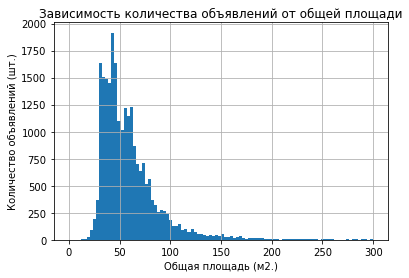

In [156]:
display(df['total_area'].hist(bins=100,
                              range = (0, 300)))
plt.title("Зависимость количества объявлений от общей площади")
plt.xlabel("Общая площадь (м2.)")
plt.ylabel("Количество объявлений (шт.)")
plt.show() 

In [162]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_square_meter', 'dayofweek',
       'year', 'month', 'floor_categ', 'living_total_area',
       'kitchen_total_area', 'total_area_group'],
      dtype='object')

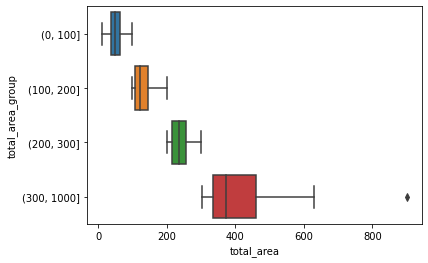

In [163]:
ax = sns.boxplot(data=df,
                 x='total_area',
                 y='total_area_group',
                 orient='h',)

In [164]:
df['last_price_group'] = pd.cut(df['last_price'],[0, 7e+05, 9e+06, 6e+07, 8e+08])
display(df.groupby('last_price_group')['last_price'].agg(['count','mean','median']))

,count,mean,median
last_price_group,,,
"(0.0, 700000.0]",79,"584,964.430","600,000.000"
"(700000.0, 9000000.0]",20285,"4,515,525.281","4,300,000.000"
"(9000000.0, 60000000.0]",3234,"15,897,870.502","12,900,000.000"
"(60000000.0, 800000000.0]",101,"118,522,857.545","85,000,000.000"


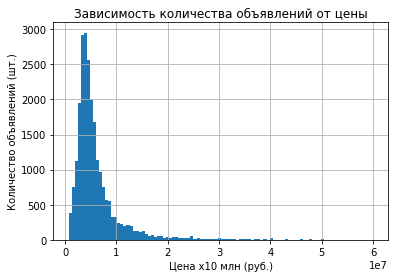

In [165]:
display(df['last_price'].hist(bins=100, 
                              range = (7e+05, 6e+07)))
plt.title("Зависимость количества объявлений от цены")
plt.xlabel("Цена х10 млн (руб.)")
plt.ylabel("Количество объявлений (шт.)")
plt.show() 

In [166]:
df['rooms_group'] = pd.cut(df['rooms'],[0, 5, 10, 15, 20])
display(df.groupby('rooms_group')['rooms'].agg(['count','mean','median']))

,count,mean,median
rooms_group,,,
"(0, 5]",23307,2.047,2.000
"(5, 10]",187,6.636,6.000
"(10, 15]",6,12.833,13.000
"(15, 20]",2,17.500,17.500


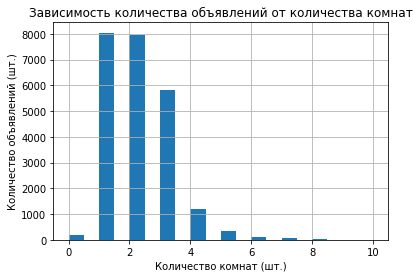

In [167]:
display(df['rooms'].hist(bins=20,
                         range = (0, 10)))
plt.title("Зависимость количества объявлений от количества комнат")
plt.xlabel("Количество комнат (шт.)")
plt.ylabel("Количество объявлений (шт.)")
plt.show() 

In [168]:
df['ceiling_height_group'] = pd.cut(df['ceiling_height'],[0, 2.2, 3, 4, 101])
display(df.groupby('ceiling_height_group')['ceiling_height'].agg(['count','mean','median']))

,count,mean,median
ceiling_height_group,,,
"(0.0, 2.2]",15,1.877,2.000
"(2.2, 3.0]",22155,2.653,2.650
"(3.0, 4.0]",1454,3.318,3.250
"(4.0, 101.0]",75,12.543,4.900


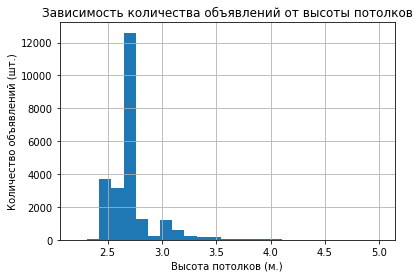

In [169]:
display(df['ceiling_height'].hist(bins=25,
                                  range = (2.2, 5)))
plt.title("Зависимость количества объявлений от высоты потолков")
plt.xlabel("Высота потолков (м.)")
plt.ylabel("Количество объявлений (шт.)")
plt.show()

##### Вывод:

    если скрыть до 10% имеющихся значений, то распределения значений получаются перспективными для анализа.

### Время продажи квартиры

Рассмотрим `days_exposition` — `дней_с_опубл` — сколько дней было размещено объявление (от публикации до снятия).

In [170]:
df['days_exposition_group'] = pd.cut(df['days_exposition'],[0, 3, 7, 459, 1200,1600])
display(df.groupby('days_exposition_group')['days_exposition'].agg(['count','mean','median']))

,count,mean,median
days_exposition_group,,,
"(0, 3]",162,2.969,3.000
"(3, 7]",686,5.606,6.000
"(7, 459]",17615,126.909,89.000
"(459, 1200]",1964,687.707,630.500
"(1200, 1600]",91,"1,329.593","1,315.000"


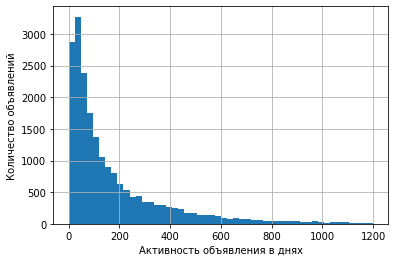

count   23,699.000
mean       156.475
std        213.646
min         -1.000
25%         22.000
50%         74.000
75%        199.000
max      1,580.000
Name: days_exposition, dtype: float64

In [171]:
display(df['days_exposition'].hist(bins=50,
                                   range = (0, 1200)))
plt.xlabel("Активность объявления в днях")
plt.ylabel("Количество объявлений")
plt.show() 
print()
display(df['days_exposition'].describe())

##### Вывод:

    - 4% квартир продается за неделю.
    - 25% квартир реализоваться в течении 1,5 месяцев.
    - Половина квартир уходит за 95 дней.
    - Если квартина не нашла нового владельца за 459 дней (90% продаж), то сроки закрытия сделки не прогнозируются.

Напомним себе, что 13,42% объявлений не имеет значений в графе days_exposition.

Рассмотрим подробнее интервал от 40 до 100 дней.

In [172]:
df['days_exposition_group'] = pd.cut(df['days_exposition'],[0, 3, 7, 459, 1200,1600])
display(df.groupby('days_exposition_group')['days_exposition'].agg(['count','mean','median']))

,count,mean,median
days_exposition_group,,,
"(0, 3]",162,2.969,3.000
"(3, 7]",686,5.606,6.000
"(7, 459]",17615,126.909,89.000
"(459, 1200]",1964,687.707,630.500
"(1200, 1600]",91,"1,329.593","1,315.000"


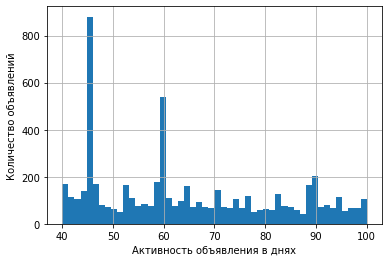

In [173]:
display(df['days_exposition'].hist(bins=50,
                                   range = (40, 100)))
plt.xlabel("Активность объявления в днях")
plt.ylabel("Количество объявлений")
plt.show() 

На 45 и 60 непонятные всплески.

Хорошо бы сверить с другими базами объявлений. Там всплесков скорее всего не будет. Такое может быть вызвано:
    
- Техническим сбоем из-за архивации и синхронизации данных
- Особенностями работы сервиса
- Объявления с новостройками или строящимися домами
- Какие-нибудь риэлторы вешали по несколько объявлений на 1 объект

### Редкие и выбивающиеся значения

В предыдущих двух разделах при построении графиков редкие значения не показывались. Таковых было в пределах 10% от общего количества значений.

Иначе графики выглядели бы следующим образом:

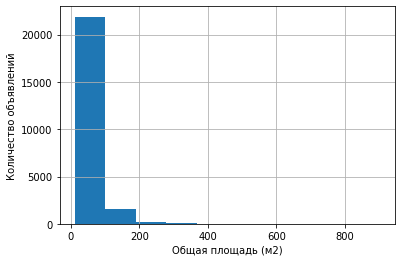

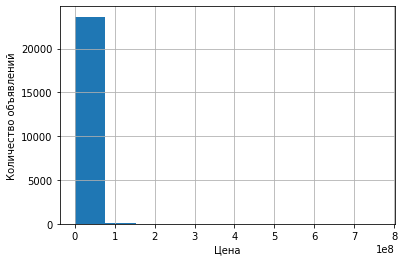

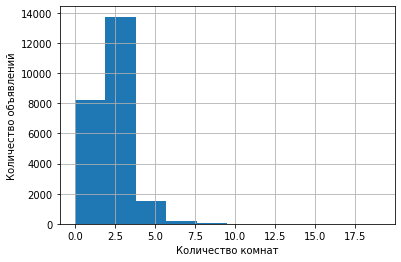

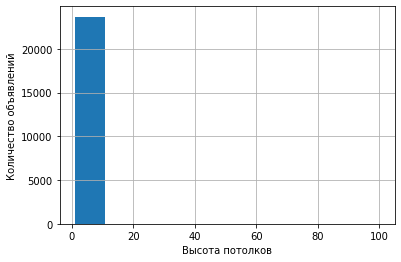

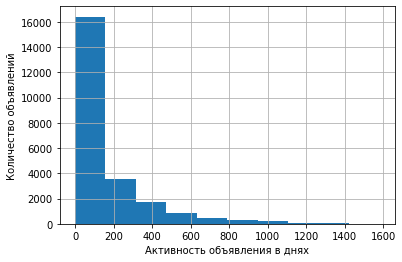

In [174]:
display(df['total_area'].hist())
plt.xlabel("Общая площадь (м2)")
plt.ylabel("Количество объявлений")
plt.show() 
print()

display(df['last_price'].hist())
plt.xlabel("Цена")
plt.ylabel("Количество объявлений")
plt.show() 
print()

display(df['rooms'].hist())
plt.xlabel("Количество комнат")
plt.ylabel("Количество объявлений")
plt.show() 
print()

display(df['ceiling_height'].hist())
plt.xlabel("Высота потолков")
plt.ylabel("Количество объявлений")
plt.show() 

display(df['days_exposition'].hist())
plt.xlabel("Активность объявления в днях")
plt.ylabel("Количество объявлений")
plt.show() 

### Какие факторы больше всего влияют на стоимость квартиры?

####Цена от квадратного метра

In [175]:
df['price_square_meter_group'] = pd.cut(df['price_square_meter'],[0, 1.6e+04, 0.4e+06, 2e+06])
display(df.groupby('price_square_meter_group')['price_square_meter'].agg(['count','mean','median']))

,count,mean,median
price_square_meter_group,,,
"(0.0, 16000.0]",81,"13,462.884","14,130.435"
"(16000.0, 400000.0]",23540,"98,088.626","95,000.000"
"(400000.0, 2000000.0]",78,"590,988.407","500,000.000"


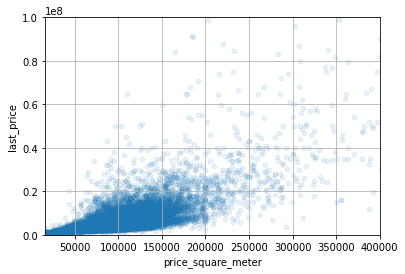


Корреляция между ценой и стоимостью квадратного метра = 0.7364988054723017


In [176]:
display(df.plot(x='price_square_meter',
                y='last_price',
                kind='scatter',
                alpha=0.1,
                xlim=(16e3, 4e5),
                ylim=(0, 1e8),
                grid=True))
plt.show()
corr_price_square_meter = df['last_price'].corr(df['price_square_meter'])
print('\nКорреляция между ценой и стоимостью квадратного метра =', corr_price_square_meter)

##### Вывод: 
    
    Цена имеет прямую хорошую корреляцию с ценой квадратного метра.

####Цена от числа комнат

In [177]:
df['rooms_group'] = pd.cut(df['rooms'],[0, 1, 3, 6, 20])
display(df.groupby('rooms_group')['rooms'].agg(['count','mean','median']))

,count,mean,median
rooms_group,,,
"(0, 1]",8047,1.000,1.000
"(1, 3]",13754,2.423,2.000
"(3, 6]",1611,4.333,4.000
"(6, 20]",90,8.033,7.000


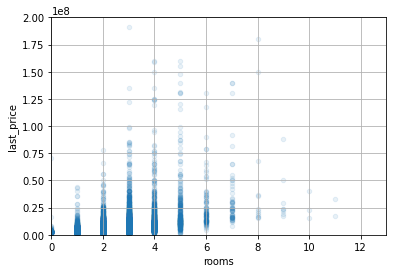


Корреляция между ценой и количеством комнат = 0.36334284996489546


In [178]:
display(df.plot(x='rooms',
                y='last_price',
                kind='scatter',
                alpha=0.1,
                xlim=(0, 13),
                ylim=(0, 2e8),
                grid=True))
plt.show()
corr_price_rooms = df['last_price'].corr(df['rooms'])
print('\nКорреляция между ценой и количеством комнат =', corr_price_rooms)

##### Вывод: 
    
    Количество комнат имеет прямую среднюю корреляцию с ценой.

####Цена от этажа (первого или последнего)

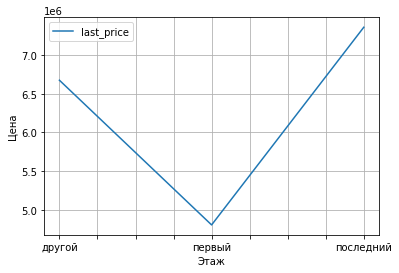

In [179]:
display(pd.pivot_table(df, 
                       index=['floor_categ'], 
                       values=['last_price']).plot(grid=True))
plt.xlabel("Этаж")
plt.ylabel("Цена")
plt.show()

##### Вывод: 
    
    -Первый этаж расположения квартиры поможет сильно сэкономить.
    -За последний этаж придется доплачивать. Но меньше, чем экономия за 1 этаж.

#### Цена от удалённости до центра

In [180]:
df['city_centers_nearest_group'] = pd.cut(df['city_centers_nearest'],[0, 15000, 30000, 45000, 66000])
display(df.groupby('city_centers_nearest_group')['city_centers_nearest'].agg(['count','mean','median']))

,count,mean,median
city_centers_nearest_group,,,
"(0, 15000]",11856,"9,748.789","10,931.000"
"(15000, 30000]",4988,"18,764.262","17,027.000"
"(30000, 45000]",1064,"32,823.490","32,385.000"
"(45000, 66000]",272,"51,086.224","51,110.500"


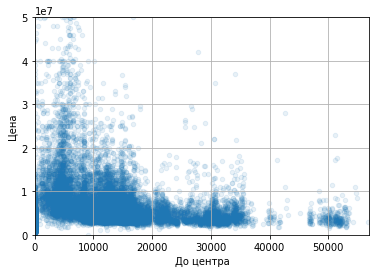


Корреляция между ценой и расстоянием до центра = -0.05095199334276187


In [181]:
display(df.plot(x='city_centers_nearest',
                y='last_price',
                kind='scatter',
                alpha=0.1,
                xlim=(0, 5.7e4),
                ylim=(0, 5e7),
                grid=True))
plt.xlabel("До центра")
plt.ylabel("Цена")
plt.show()
corr_price_centers_nearest = df['last_price'].corr(df['city_centers_nearest'])
print('\nКорреляция между ценой и расстоянием до центра =', corr_price_centers_nearest)

##### Вывод: 
    
    -Вполне ожидаемо, что чем дальше от центра, тем меньше цена. Правда не совсем однозначно.
    -Интересная география Ленинградской области:
       -- небольшой провал цен в районе 25 км от центра;
       -- малое количество предложений на радиусе 40 км (+/-).

#### Цена от даты размещения: дня недели, месяца и года

Цена от даты размещения: дня недели.

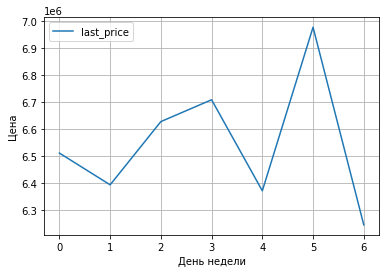


Корреляция между ценой и днем недели = 0.0015501452176215431


In [182]:
display(pd.pivot_table(df,
                       index=['dayofweek'],
                       values=['last_price']).plot(grid=True))
plt.xlabel("День недели")
plt.ylabel("Цена")
plt.show()
corr_price_dayofweek = df['last_price'].corr(df['dayofweek'])
print('\nКорреляция между ценой и днем недели =', corr_price_dayofweek)

##### Вывод. День недели

Статистика для игроков: 
    
    -Покупать лучше по воскресениям, пятницам, вторникам.
    -Продавать интереснее по субботам, четвергам и средам.
    -Понедельник крайний случай для первых двух вариантов.

Цена от даты размещения: года.

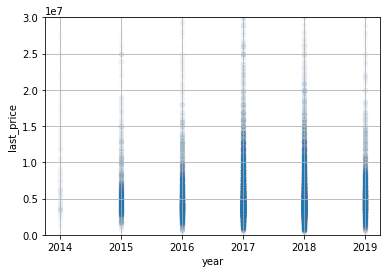

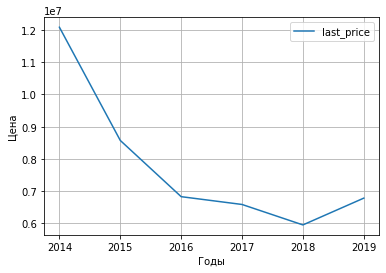


Корреляция между ценой и годом = -0.04308903619950858


In [183]:
display(df.plot(x='year',
                y='last_price',
                kind='scatter',
                alpha=0.01,
                ylim=(0, 3e7),
                grid=True))
display(pd.pivot_table(df,
                       index=['year'],
                       values=['last_price']).plot(grid=True))
plt.xlabel("Годы")
plt.ylabel("Цена")
plt.show()
corr_price_year = df['last_price'].corr(df['year'])
print('\nКорреляция между ценой и годом =', corr_price_year)

##### Вывод. Год
    
    -С `14 по `18 год цена падала с ростом предложений.
    -В `19 году предложение снизилось, цена приподнялась.

Цена от даты размещения: месяца.

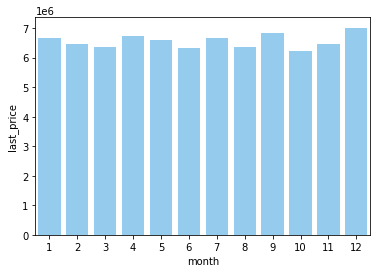

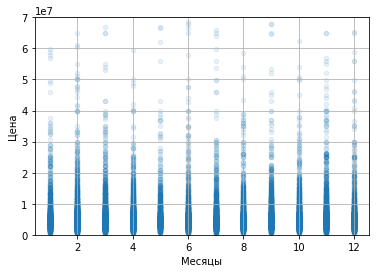


Корреляция между ценой и месяцем = 0.0027791287507397252


In [184]:
plt.show(sns.barplot(x=df['month'],
                     y=df['last_price'],
                     ci=None,
                     color='lightskyblue'))
display(df.plot(x='month',
                y='last_price',
                kind='scatter',
                alpha=0.1,
                ylim=(0, 7e7),
                grid=True))
plt.xlabel("Месяцы")
plt.ylabel("Цена")
plt.show()
corr_price_month = df['last_price'].corr(df['month'])
print('\nКорреляция между ценой и месяцем =', corr_price_month)

##### Вывод. Месяц
    
    Цена от месяца осуществления сделки не зависит.

### 10 населённых пунктов с наибольшим числом объявлений

In [185]:
print('\n10 населённых пунктов с наибольшим числом объявлений с максимальной средней ценой квадратного метра:')
display(df.groupby('locality_name')['price_square_meter']
        .agg(['count','mean'])
        .sort_values(by='count', ascending=False)
        .head(10))


10 населённых пунктов с наибольшим числом объявлений с максимальной средней ценой квадратного метра:


,count,mean
locality_name,,
Санкт-Петербург,15758,"114,821.870"
поселок Мурино,556,"85,681.763"
поселок Шушары,440,"78,677.364"
Всеволожск,398,"68,654.474"
Пушкин,369,"103,125.819"
Колпино,338,"75,424.579"
поселок Парголово,327,"90,175.913"
Гатчина,307,"68,746.147"
деревня Кудрово,299,"92,473.548"


In [186]:
print('\n10 населённых пунктов с самой высокой стоимостью жилья:')
display(df.groupby('locality_name')['last_price']
        .agg(['count','max'])
        .sort_values(by='max', ascending=False)
        .head(10))


10 населённых пунктов с самой высокой стоимостью жилья:


,count,max
locality_name,,
Санкт-Петербург,15758,763000000
Пушкин,369,42000000
Колпино,338,36900000
поселок Репино,4,28000000
Всеволожск,398,24412900
Зеленогорск,24,23000000
Петергоф,201,22000000
Сестрорецк,183,21700000
Красное Село,178,21000000


In [187]:
print('\n10 населённых пунктов с самой низкой стоимостью жилья:')
display(df.groupby('locality_name')['last_price']
        .agg(['count','min'])
        .sort_values(by='min')
        .head(10))


10 населённых пунктов с самой низкой стоимостью жилья:


,count,min
locality_name,,
Санкт-Петербург,15758,12190
поселок станции Свирь,2,430000
Сланцы,112,430000
деревня Старополье,3,440000
деревня Ям-Тесово,2,450000
городской поселок Будогощь,4,450000
деревня Вахнова Кара,1,450000
поселок Совхозный,2,470000
деревня Выскатка,2,470000


### Изучение предложения квартир

Переведем метры расстояния в километры.

In [188]:
df['city_cent_near_km'] = round(df['city_centers_nearest'] / 1000)

Выделим в отдельную табличку только записи по Санкт-Петербургу. 

In [189]:
dfp= df[df['locality_name'] == 'Санкт-Петербург']

Посмотрим зависимость цены от расстояния до центра.

Text(0, 0.5, 'Цена')

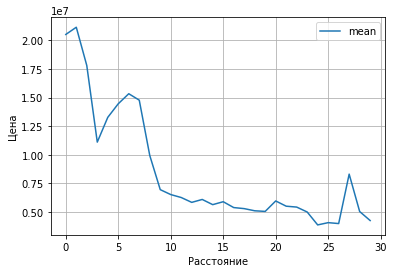

In [190]:
display(pd.pivot_table(dfp
                       .groupby('city_cent_near_km')['last_price']
                       .agg(['count','mean'])
                       .sort_values(by='city_cent_near_km'), 
                       index=['city_cent_near_km'], 
                       values=['mean'])
                       .plot(grid=True))
plt.xlabel("Расстояние")
plt.ylabel("Цена")

##### Вывод: 
    
    - В центре дорого. Чем дальше, тем дешевле.
    - Особенность географии Санкт-Петербурга:
       -- рост цен на расстоянии 3-8 км;
       -- есть всплеск на 27 км.

### Cегмент квартир

Посмотрим зависимость количества объявлений от общей площади квартир.

In [191]:
dfp['total_area_group'] = pd.cut(dfp['total_area'], [0, 100, 200, 300, 1000])
display(dfp.groupby('total_area_group')['total_area'].agg(['count', 'mean', 'median']))

,count,mean,median
total_area_group,,,
"(0, 100]",14081,54.618,51.000
"(100, 200]",1464,130.033,122.040
"(200, 300]",156,240.526,236.200
"(300, 1000]",57,411.894,380.000


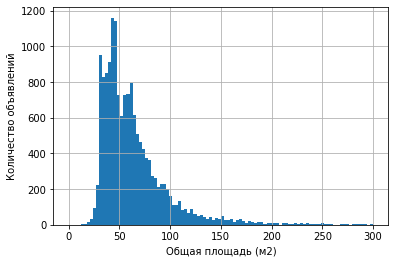

In [192]:
display(dfp['total_area'].hist(bins=100,
                               range = (0, 300)))
plt.xlabel("Общая площадь (м2)")
plt.ylabel("Количество объявлений")
plt.show() 

Посмотрим зависимость количества объявлений от цены.

In [193]:
dfp['last_price_group'] = pd.cut(df['last_price'], [0, 7e+05, 9e+06, 6e+07, 8e+08])
display(dfp.groupby('last_price_group')['last_price'].agg(['count', 'mean', 'median']))

,count,mean,median
last_price_group,,,
"(0.0, 700000.0]",1,"12,190.000","12,190.000"
"(700000.0, 9000000.0]",12556,"5,218,935.078","4,950,000.000"
"(9000000.0, 60000000.0]",3100,"15,973,350.561","12,900,000.000"
"(60000000.0, 800000000.0]",101,"118,522,857.545","85,000,000.000"


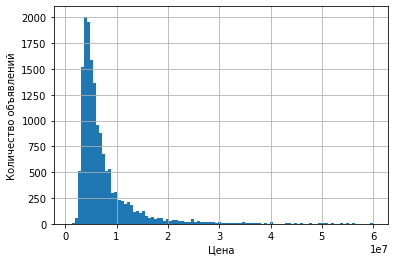

In [194]:
display(dfp['last_price'].hist(bins=100,
                               range = (7e+05, 6e+07)))
plt.xlabel("Цена")
plt.ylabel("Количество объявлений")
plt.show() 

Посмотрим зависимость количества объявлений от количества комнат.

In [195]:
dfp['rooms_group'] = pd.cut(df['rooms'], [0, 5, 10, 15, 20])
display(dfp.groupby('rooms_group')['rooms'].agg(['count', 'mean', 'median']))

,count,mean,median
rooms_group,,,
"(0, 5]",15462,2.130,2.000
"(5, 10]",178,6.646,6.000
"(10, 15]",6,12.833,13.000
"(15, 20]",2,17.500,17.500


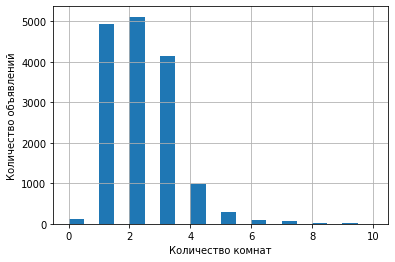

In [196]:
display(dfp['rooms'].hist(bins=20,
                          range = (0, 10)))
plt.xlabel("Количество комнат")
plt.ylabel("Количество объявлений")
plt.show() 

Посмотрим зависимость количества объявлений от высоты потолков.

In [197]:
dfp['ceiling_height_group'] = pd.cut(df['ceiling_height'], [0, 2.2, 3, 4, 101])
display(dfp.groupby('ceiling_height_group')['ceiling_height'].agg(['count', 'mean', 'median']))

,count,mean,median
ceiling_height_group,,,
"(0.0, 2.2]",4,1.688,1.875
"(2.2, 3.0]",14349,2.663,2.650
"(3.0, 4.0]",1347,3.316,3.250
"(4.0, 101.0]",58,10.953,4.575


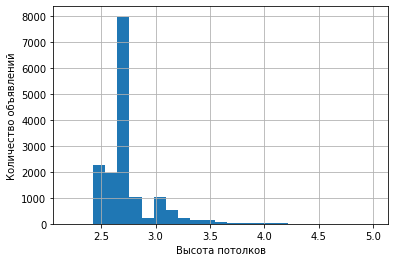

In [198]:
display(dfp['ceiling_height'].hist(bins=25,
                                   range = (2.2, 5)))
plt.xlabel("Высота потолков")
plt.ylabel("Количество объявлений")
plt.show() 

##### Вывод. Площадь, цена, число комнат, высота потолков
    
    - Форму распределения параметров, вычет Ленинградской области не поменял. Даже всплески сохранились.
     Визуально изменились только количество объявлений.
    - А вот сравнение табличных значений кое-что выявило:
    
        -- медиана площадей до 100 м2  увеличилась с 49.90  до 51.00
        -- медиана площадей до 200 м2  увеличилась с 121.20 до 122.04
        -- медиана площадей до 300 м2  увеличилась с 235.00 до 236.20
        -- медиана площадей до 1000 м2 увеличилась с 374.60 до 380.00
           --- Средняя площадь квартир в Питере больше, чем в области
           
        -- медиана стоимости объекта до 700000 уменьшилась  с 600000  до 12190 (79 объектов против 1)
        -- медиана стоимости объекта до 9000000 увеличилась с 4300000 до 4950000
           --- Средняя цена квартир от 700 тыс до 9 млн в Питере больше, чем в области
        -- медиана стоимости объекта от 9000001 до 800000000 не изменилась
           --- Почти все эти объекты располагаются в Питере
           
        -- медиана количества комнат во всем диапазоне не изменилась
           --- Среднее количество комнат в квартирах Питера и области одинаковое
           
        -- медиана высоты потолков до 2.2  м  уменьшилась с 2.000 тыс до 1.875
        -- медиана высоты потолков до 3.0  м  увеличилась с 2.600 тыс до 2.650
        -- медиана высоты потолков до 4.0  м  не изменилась
        -- медиана высоты потолков до 101.0 м уменьшилась с 4.900 тыс до 4.575
           --- Средняя высота комнат в квартирах Питера побольше, чем в области; 
               т.к. второй диапазон включает подавляющее большинство исследуемых значений.

Также посмотрим факторы, которые влияют на стоимость квартиры.

Цена от числа комнат:

In [199]:
dfp['rooms_group'] = pd.cut(df['rooms'], [0, 1, 3, 6, 20])
display(dfp.groupby('rooms_group')['rooms'].agg(['count','mean', 'median']))

,count,mean,median
rooms_group,,,
"(0, 1]",4945,1.000,1.000
"(1, 3]",9253,2.447,2.000
"(3, 6]",1363,4.359,4.000
"(6, 20]",87,8.057,7.000


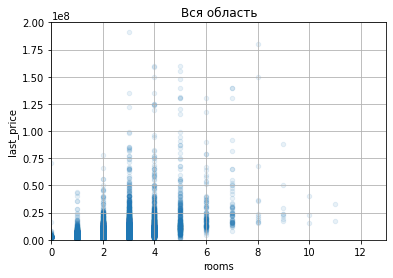

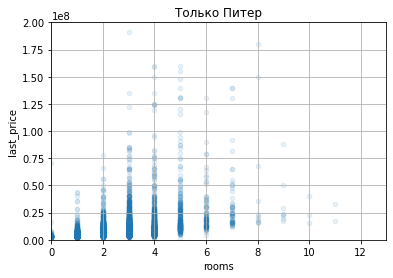

In [200]:
display(df.plot(x='rooms',
                y='last_price',
                kind='scatter',
                alpha=0.1,
                xlim=(0, 13),
                ylim=(0, 2e8),
                title='Вся область',
                grid=True),
        dfp.plot(x='rooms',
                 y='last_price',
                 kind='scatter',
                 alpha=0.1,
                 xlim=(0, 13),
                 ylim=(0, 2e8),
                 title='Только Питер',
                 grid=True))
plt.show() 

Цена от этажа расположения:

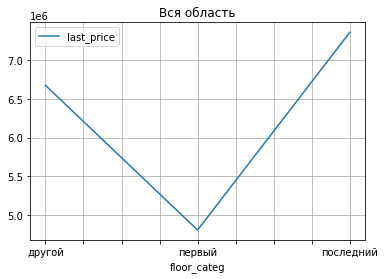

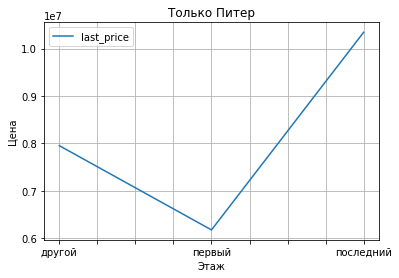

In [201]:
display(pd.pivot_table(df, 
                       index=['floor_categ'], 
                       values=['last_price']).plot(grid=True,
                                                   title='Вся область'))
display(pd.pivot_table(dfp, 
                       index=['floor_categ'], 
                       values=['last_price']).plot(grid=True,
                                                   title='Только Питер'))
plt.xlabel("Этаж")
plt.ylabel("Цена")
plt.show()

Изенение цены при удалённости от центра:

In [202]:
dfp['city_centers_nearest_group'] = pd.cut(df['city_centers_nearest'], [0, 15000, 30000, 45000, 66000])
display(dfp.groupby('city_centers_nearest_group')['city_centers_nearest'].agg(['count', 'mean', 'median']))

,count,mean,median
city_centers_nearest_group,,,
"(0, 15000]",11856,"9,748.789","10,931.000"
"(15000, 30000]",3841,"17,294.546","16,454.000"
"(30000, 45000]",0,NaN,NaN
"(45000, 66000]",0,NaN,NaN


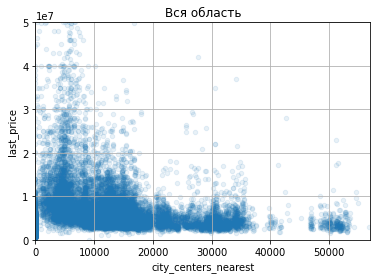

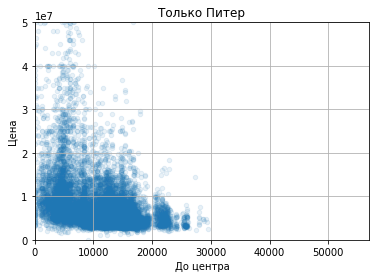

In [203]:
display(df.plot(x='city_centers_nearest',
                y='last_price',
                kind='scatter',
                alpha=0.1,
                xlim=(0, 5.7e4),
                ylim=(0, 5e7),
                title='Вся область',
                grid=True),
        dfp.plot(x='city_centers_nearest',
                 y='last_price',
                 kind='scatter',
                 alpha=0.1,
                 xlim=(0, 5.7e4),
                 ylim=(0, 5e7),
                 title='Только Питер',
                 grid=True))
plt.xlabel("До центра")
plt.ylabel("Цена")
plt.show() 

Цена  от даты размещения объявления:

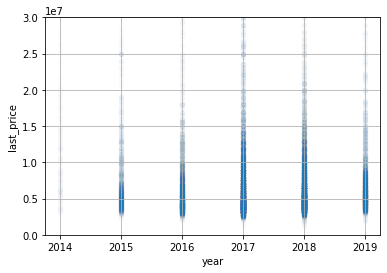

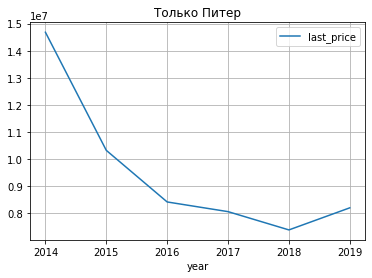

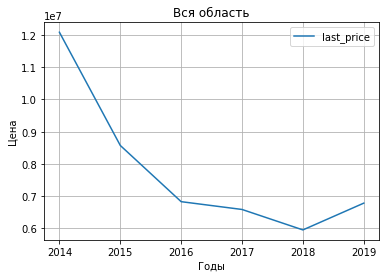

In [204]:
display(dfp.plot(x='year',
                 y='last_price',
                 kind='scatter',
                 alpha=0.01,
                 ylim=(0, 3e7),
                 grid=True))
display(pd.pivot_table(dfp,
                       index=['year'],
                       values=['last_price']).plot(grid=True,
                                                   title='Только Питер'),
        pd.pivot_table(df,
                       index=['year'],
                       values=['last_price']).plot(grid=True,
                                                   title='Вся область'))
plt.xlabel("Годы")
plt.ylabel("Цена")
plt.show()

##### Вывод. Число комнат, этаж, удалённость от центра, дата размещения объявления

           --- Зависимость цены от количества комнат не поменялась
           --- Цена от этажей поменяла только размер, но не распределение
           --- График цены от расстояния до центра стал с отсечкой на 30 км
           --- Распределение цены по годам сохранилось, только цены стали повыше

## Пропущенные значения

Возьмем параметр "до_центр" (city_centers_nearest) там 23.29% пропусков. За одно можно будет сравнить распределения в "придуманных" табличках с реальными.

Данные по всей области:

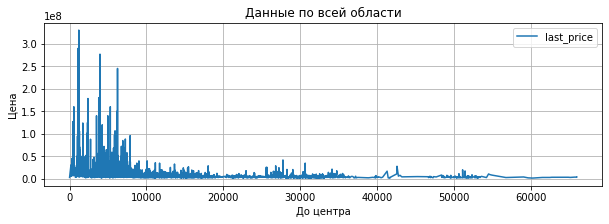

In [205]:
display(pd.pivot_table(df,
                       index=['city_centers_nearest'],
                       values=['last_price']).plot(grid=True,
                                                   figsize=(10, 3),
                                                   title='Данные по всей области'))
plt.xlabel("До центра")
plt.ylabel("Цена")
plt.show() 

Данные по Питеру:

Text(0, 0.5, 'Цена')

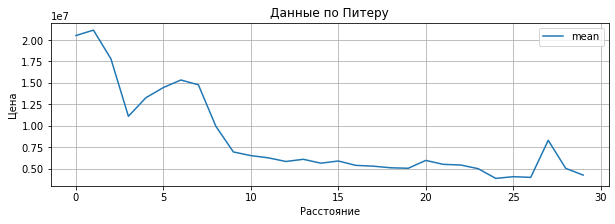

In [206]:
display(pd.pivot_table(dfp.groupby('city_cent_near_km')['last_price']
                       .agg(['count','mean'])
                       .sort_values(by='city_cent_near_km'),
                       index=['city_cent_near_km'],
                       values=['mean']).plot(grid=True,
                                             figsize=(10, 3),
                                             title='Данные по Питеру'))
plt.xlabel("Расстояние")
plt.ylabel("Цена")

Просто заменим значения "-1", которыми мы заменяли пропуски, на медианы:

In [207]:
df_m = df
dfp_m = dfp
df_m.loc[df_m["city_centers_nearest"] == -1, "city_centers_nearest"] = df_m['city_centers_nearest'].median()
display('Значения до центра по области:', df_m['city_centers_nearest'].sort_values().unique())
dfp_m.loc[dfp_m["city_centers_nearest"] == -1, "city_centers_nearest"] = dfp_m['city_centers_nearest'].median()
display('Значения до центра в Питере:', dfp_m['city_centers_nearest'].sort_values().unique())

'Значения до центра по области:'

array([  181,   208,   215, ..., 65764, 65952, 65968])

'Значения до центра в Питере:'

array([  181.,   208.,   215., ..., 29263., 29343., 29493.])

Данные по всей области:

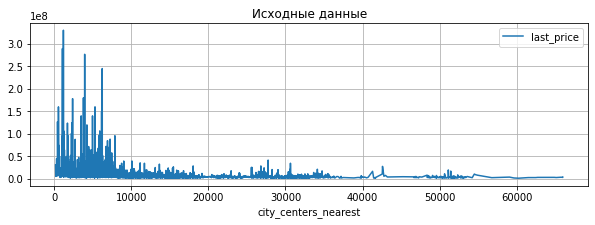

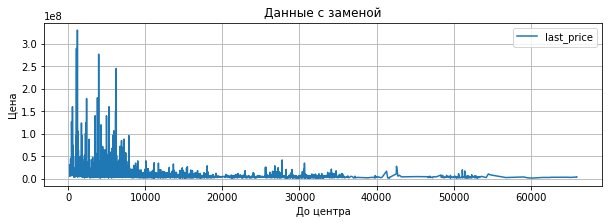


Медиана = 11247.0


In [208]:
display(pd.pivot_table(df,
                       index=['city_centers_nearest'],
                       values=['last_price']).plot(grid=True,
                                                   figsize=(10, 3),
                                                   title='Исходные данные'),
        pd.pivot_table(df_m,
                       index=['city_centers_nearest'],
                       values=['last_price']).plot(grid=True,
                                                   figsize=(10, 3),
                                                   title='Данные с заменой'))
plt.xlabel("До центра")
plt.ylabel("Цена")
plt.show()
print('\nМедиана =', df_m['city_centers_nearest'].median())

Данные по Питеру:


Медиана = 12217.75 



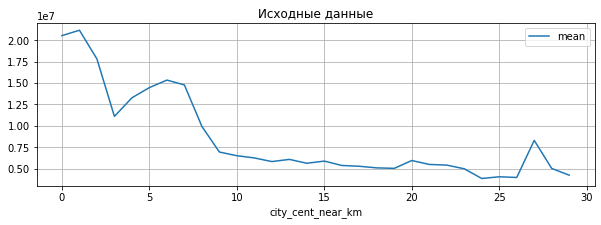

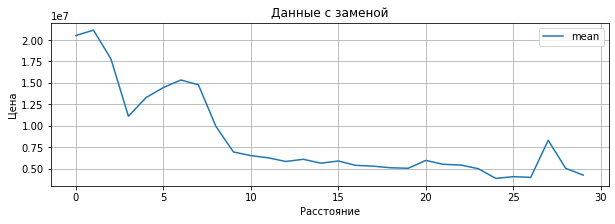

In [209]:
display(pd.pivot_table(dfp.groupby('city_cent_near_km')['last_price']
                       .agg(['count','mean'])
                       .sort_values(by='city_cent_near_km'),
                       index=['city_cent_near_km'],
                       values=['mean']).plot(grid=True,
                                             figsize=(10, 3),
                                             title='Исходные данные'),
        pd.pivot_table(dfp_m.groupby('city_cent_near_km')['last_price']
                       .agg(['count','mean'])
                       .sort_values(by='city_cent_near_km'),
                       index=['city_cent_near_km'],
                       values=['mean']).plot(grid=True,
                                             figsize=(10, 3),
                                             title='Данные с заменой'))
plt.xlabel("Расстояние")
plt.ylabel("Цена")
print('\nМедиана =', dfp_m['city_centers_nearest'].median(), '\n')

##### Вывод:

    На таком масштабе ничего не вылезло (графики 1 в 1), так что и дробить медиану по категориям не целесообразно.

Совместим графики в одних осях для наглядности идентичности.

Данные по всей области:

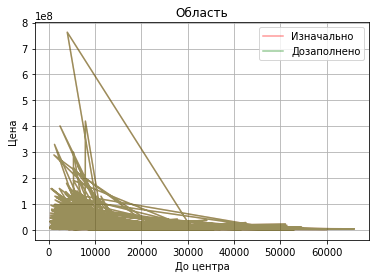

<Figure size 720x216 with 0 Axes>

In [210]:
plt.plot(df['city_centers_nearest'],
         df['last_price'],
         'r',
         df_m['city_centers_nearest'],
         df['last_price'],
         'g', 
         alpha=0.4)
plt.xlabel("До центра")
plt.ylabel("Цена")
plt.title("Область")
plt.legend(['Изначально',
            'Дозаполнено'])
plt.grid()
plt.figure(figsize=(10, 3))
plt.show()

Данные по Питеру:

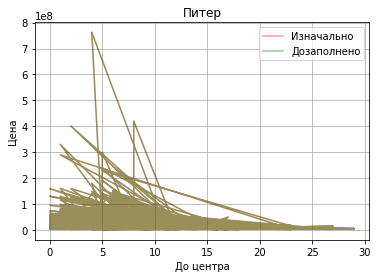

<Figure size 720x216 with 0 Axes>

In [211]:
plt.plot(dfp['city_cent_near_km'],
         dfp['last_price'],
         'r',
         dfp_m['city_cent_near_km'],
         dfp['last_price'],
         'g', 
         alpha=0.4)
plt.xlabel("До центра")
plt.ylabel("Цена")
plt.title("Питер")
plt.legend(['Изначально',
            'Дозаполнено'])
plt.grid()
plt.figure(figsize=(10, 3))
plt.show()

Выведем табличку с коэффициентами корреляции перед финальным выводом.

In [212]:
data = {'Цена от': ['квадратного метра',
                     'количеством комнат',
                     'расстоянием до центра',
                     'дня недели',
                     'месяца',
                     'года'],
         'Корреляция': [corr_price_square_meter,
                        corr_price_rooms,
                        corr_price_centers_nearest,
                        corr_price_dayofweek,
                        corr_price_month,
                        corr_price_year]}
pivot = pd.DataFrame(data)
pivot

,Цена от,Корреляция
0,квадратного метра,0.736
1,количеством комнат,0.363
2,расстоянием до центра,-0.051
3,дня недели,0.002
4,месяца,0.003
5,года,-0.043


## Общий вывод

Исследование данных сервиса Яндекc Недвижимость по архиву объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет, согласно прилагаемому заданию выполнено в полном объеме. 

Полученные статистические данные можно использовать для определения рыночной стоимости объектов недвижимости ориентируясь на схожести параметров. Основные маркеры влияющие на цену это цена квадратного метра, количество комнат, удаление от центра, первый-последний этажи и год продажи. Остальные параметры будут вносить менее значимые корректировки.

Все промежутоные выводы вынесены в содержание для простоты ориентирования и более быстрого перемещения к нужному параметру. 

А вот построить автоматизированную систему: она отследит аномалии и мошенническую деятельность...? Начало для этого положено, но до результата отсель далековато.  

Добавим матрицу корреляций для исследованных столбцов влияющих на цену квартиры.

,last_price,price_square_meter,rooms,city_centers_nearest,dayofweek,month,year
last_price,1.000,0.736,0.363,-0.171,0.002,0.003,-0.043
price_square_meter,0.736,1.000,0.055,-0.209,-0.007,-0.002,0.009
rooms,0.363,0.055,1.000,-0.147,-0.004,-0.004,-0.055
city_centers_nearest,-0.171,-0.209,-0.147,1.000,0.007,-0.007,0.020
dayofweek,0.002,-0.007,-0.004,0.007,1.000,0.011,-0.005
month,0.003,-0.002,-0.004,-0.007,0.011,1.000,-0.270
year,-0.043,0.009,-0.055,0.020,-0.005,-0.270,1.000


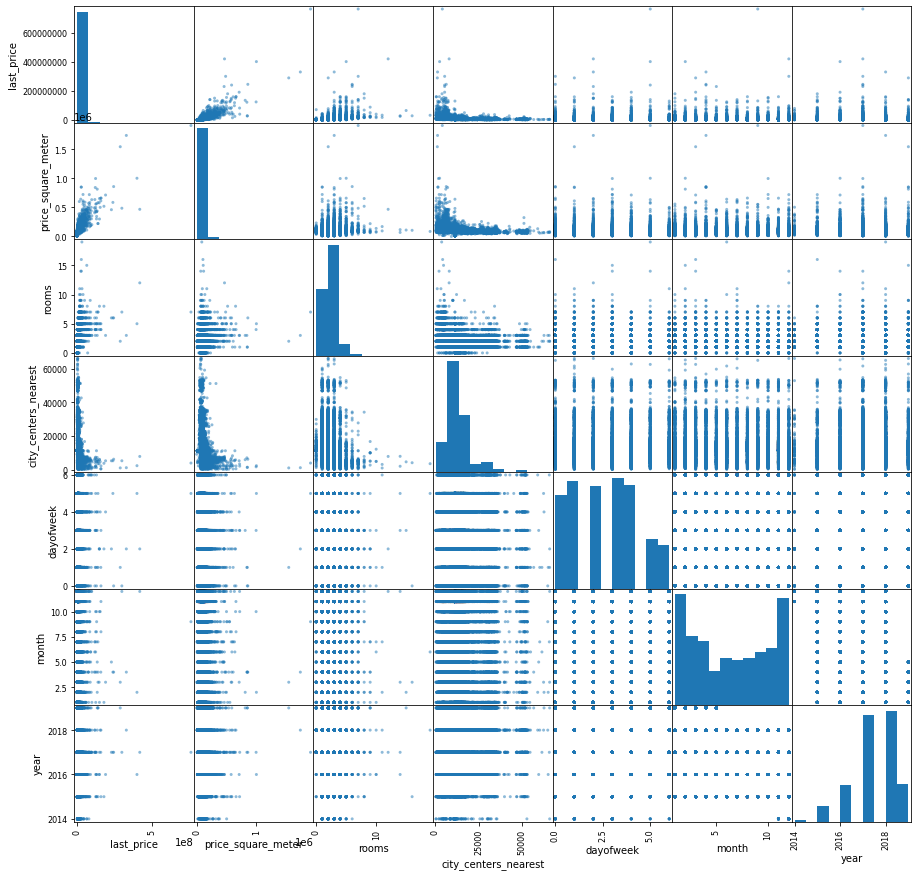

In [213]:
corr_table = df[['last_price',
                 'price_square_meter',
                 'rooms',
                 'city_centers_nearest',
                 'dayofweek',
                 'month',
                 'year']]
pd.plotting.scatter_matrix(corr_table,
                           figsize=(15,15))
display(corr_table.corr())